In [1]:
# Import required packages
import pandas as pd    
import numpy as np
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns;
import statsmodels.api as sm
from scipy import special
import matplotlib.dates as mdates
# import statsmodels.tsa.stattools as ts
# from sklearn.model_selection import train_test_split
# from scipy import stats

federal funds rate (%)
Time                              
1954-07-01                    0.80
1954-08-01                    1.22
1954-09-01                    1.06
1954-10-01                    0.85
1954-11-01                    0.83
1954-12-01                    1.28
1955-01-01                    1.39
1955-02-01                    1.29
1955-03-01                    1.35
1955-04-01                    1.43
1955-05-01                    1.43
1955-06-01                    1.64
1955-07-01                    1.68
1955-08-01                    1.96
1955-09-01                    2.18
1955-10-01                    2.24
1955-11-01                    2.35
1955-12-01                    2.48
1956-01-01                    2.45
1956-02-01                    2.50
1956-03-01                    2.50
1956-04-01                    2.62
1956-05-01                    2.75
1956-06-01                    2.71
1956-07-01                    2.75
1956-08-01                    2.73
1956-09-01                    2.95
1956-10-01                    2.96
1956-11-01                    2.88
1956-12-01                    2.94
...                            ...
2017-04-01                    0.90
2017-05-01                    0.91
2017-06-01                    1.04
2017-07-01                    1.15
2017-08-01                    1.16
2017-09-01                    1.15
2017-10-01                    1.15
2017-11-01                    1.16
2017-12-01                    1.30
2018-01-01                    1.41
2018-02-01                    1.42
2018-03-01                    1.51
2018-04-01                    1.69
2018-05-01                    1.70
2018-06-01                    1.82
2018-07-01                    1.91
2018-08-01                    1.91
2018-09-01                    1.95
2018-10-01                    2.19
2018-11-01                    2.20
2018-12-01                    2.27
2019-01-01                    2.40
2019-02-01                    2.40
2019-03-01                    2.41
2019-04-01                    2.42
2019-05-01                    2.39
2019-06-01                    2.38
2019-07-01                    2.40
2019-08-01                    2.13
2019-09-01                    2.04

[783 rows x 1 columns]

federal funds rate (%)
Time                              
1954-09-30                1.026667
1954-12-31                0.986667
1955-03-31                1.343333
1955-06-30                1.500000
1955-09-30                1.940000
1955-12-31                2.356667
1956-03-31                2.483333
1956-06-30                2.693333
1956-09-30                2.810000
1956-12-31                2.926667
1957-03-31                2.933333
1957-06-30                3.000000
1957-09-30                3.233333
1957-12-31                3.253333
1958-03-31                1.863333
1958-06-30                0.940000
1958-09-30                1.323333
1958-12-31                2.163333
1959-03-31                2.570000
1959-06-30                3.083333
1959-09-30                3.576667
1959-12-31                3.990000
1960-03-31                3.933333
1960-06-30                3.696667
1960-09-30                2.936667
1960-12-31                2.296667
1961-03-31                2.003333
1961-06-30                1.733333
1961-09-30                1.683333
1961-12-31                2.400000
...                            ...
2012-06-30                0.153333
2012-09-30                0.143333
2012-12-31                0.160000
2013-03-31                0.143333
2013-06-30                0.116667
2013-09-30                0.083333
2013-12-31                0.086667
2014-03-31                0.073333
2014-06-30                0.093333
2014-09-30                0.090000
2014-12-31                0.100000
2015-03-31                0.110000
2015-06-30                0.123333
2015-09-30                0.136667
2015-12-31                0.160000
2016-03-31                0.360000
2016-06-30                0.373333
2016-09-30                0.396667
2016-12-31                0.450000
2017-03-31                0.700000
2017-06-30                0.950000
2017-09-30                1.153333
2017-12-31                1.203333
2018-03-31                1.446667
2018-06-30                1.736667
2018-09-30                1.923333
2018-12-31                2.220000
2019-03-31                2.403333
2019-06-30                2.396667
2019-09-30                2.190000

[261 rows x 1 columns]

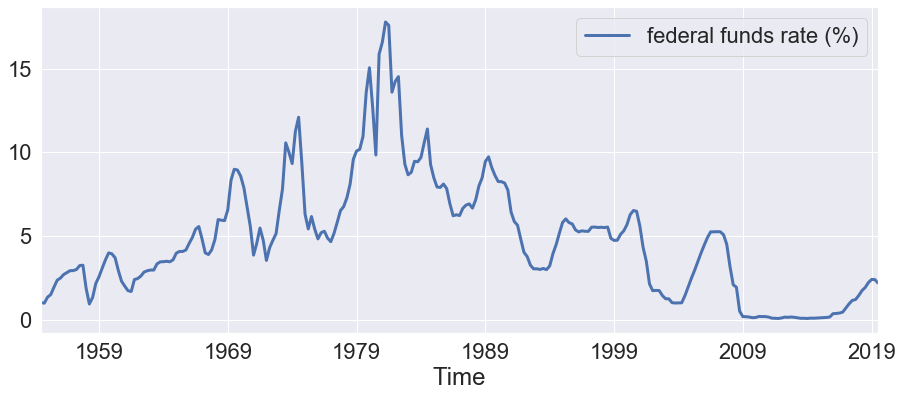

In [2]:
sns.set(rc={'figure.figsize':(15, 6)},font_scale=2)
# federal effective fund rate (annualized)
fed_rate = pd.read_csv('FRB_H15.csv',skiprows = 5) # unit:percent per annum
fed_rate.columns = ['Time','federal funds rate (%)']
fed_rate['Time'] = pd.to_datetime(fed_rate['Time'])
fed_rate.iloc[:,1] = pd.to_numeric(fed_rate.iloc[:,1])
fed_rate = fed_rate.set_index('Time')
fed_rate
# transform to quarterly data
fed_rate_Q = fed_rate.resample('Q').mean()
fed_rate_Q
fed_rate_Q.plot(lw=3)

Output Gap (% of GDP)
Time                             
1949-03-31              -0.063506
1949-06-30              -1.655340
1949-09-30              -1.895234
1949-12-31              -3.954176
1950-03-31              -1.453611
1950-06-30               0.240728
1950-09-30               2.751175
1950-12-31               3.333810
1951-03-31               3.312805
1951-06-30               3.618375
1951-09-30               4.250634
1951-12-31               3.007417
1952-03-31               2.656780
1952-06-30               1.459393
1952-09-30               0.837600
1952-12-31               2.851080
1953-03-31               3.588350
1953-06-30               3.361176
1953-09-30               1.861756
1953-12-31              -0.490283
1954-03-31              -1.671553
1954-06-30              -2.203104
1954-09-30              -1.696618
1954-12-31              -0.360984
1955-03-31               1.857851
1955-06-30               2.889409
1955-09-30               3.648519
1955-12-31               3.629457
1956-03-31               2.577843
1956-06-30               2.771966
...                           ...
2012-03-31              -2.923136
2012-06-30              -2.873204
2012-09-30              -3.120867
2012-12-31              -3.399415
2013-03-31              -2.945101
2013-06-30              -3.230644
2013-09-30              -2.884472
2013-12-31              -2.526109
2014-03-31              -3.213266
2014-06-30              -2.321828
2014-09-30              -1.554048
2014-12-31              -1.428640
2015-03-31              -1.088975
2015-06-30              -0.796962
2015-09-30              -0.910018
2015-12-31              -1.315117
2016-03-31              -1.250681
2016-06-30              -1.206303
2016-09-30              -1.087702
2016-12-31              -1.007292
2017-03-31              -0.861917
2017-06-30              -0.752038
2017-09-30              -0.396155
2017-12-31               0.033653
2018-03-31               0.202456
2018-06-30               0.589182
2018-09-30               0.821959
2018-12-31               0.592021
2019-03-31               0.848147
2019-06-30               0.828815

[282 rows x 1 columns]

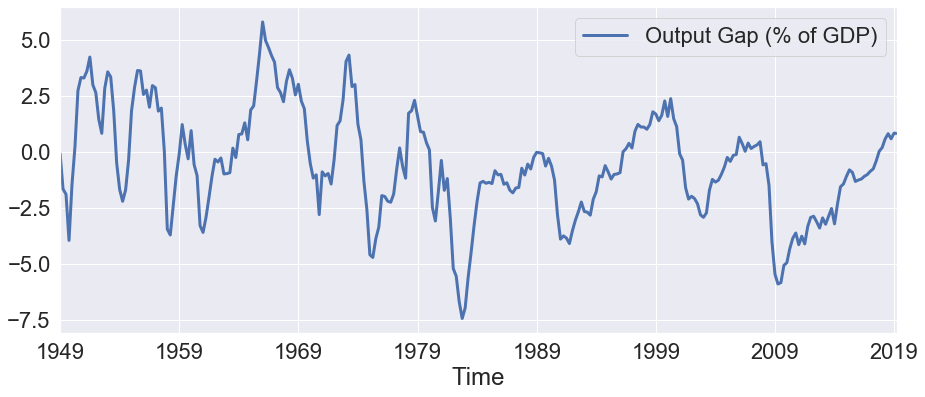

In [3]:
# output gap
output_gap = pd.read_csv('CBO_potential GDP.csv',usecols=[0,3]).dropna() # unit:percent
output_gap.columns = ['Time','Output Gap (% of GDP)']
output_gap = output_gap[1:]
output_gap.iloc[:,1]=pd.to_numeric(output_gap.iloc[:,1])
output_gap.iloc[:,0]=pd.to_datetime(output_gap.iloc[:,0])
output_gap = output_gap.set_index('Time')
output_gap = output_gap.resample('Q').mean()
output_gap
output_gap.plot(lw=3)

CPI
1947-01-01   12.250
1947-04-01   12.348
1947-07-01   12.578
1947-10-01   12.891
1948-01-01   13.034
1948-04-01   13.169
1948-07-01   13.370
1948-10-01   13.328
1949-01-01   13.223
1949-04-01   13.142
1949-07-01   13.066
1949-10-01   13.056
1950-01-01   13.034
1950-04-01   13.097
1950-07-01   13.371
1950-10-01   13.609
1951-01-01   14.041
1951-04-01   14.154
1951-07-01   14.173
1951-10-01   14.361
1952-01-01   14.422
1952-04-01   14.419
1952-07-01   14.513
1952-10-01   14.537
1953-01-01   14.592
1953-04-01   14.613
1953-07-01   14.692
1953-10-01   14.756
1954-01-01   14.830
1954-04-01   14.810
...             ...
2012-04-01   99.776
2012-07-01  100.062
2012-10-01  100.624
2013-01-01  100.982
2013-04-01  101.057
2013-07-01  101.466
2013-10-01  101.880
2014-01-01  102.357
2014-04-01  102.846
2014-07-01  103.123
2014-10-01  102.992
2015-01-01  102.542
2015-04-01  103.048
2015-07-01  103.339
2015-10-01  103.253
2016-01-01  103.297
2016-04-01  103.910
2016-07-01  104.344
2016-10-01  104.812
2017-01-01  105.355
2017-04-01  105.596
2017-07-01  106.033
2017-10-01  106.733
2018-01-01  107.401
2018-04-01  107.988
2018-07-01  108.413
2018-10-01  108.772
2019-01-01  108.879
2019-04-01  109.522
2019-07-01  109.928

[291 rows x 1 columns]

Inflation rate (%)
1947-06-30            3.200000
1947-09-30            7.450599
1947-12-31            9.953888
1948-03-31            4.437204
1948-06-30            4.143011
1948-09-30            6.105247
1948-12-31           -1.256545
1949-03-31           -3.151261
1949-06-30           -2.450276
1949-09-30           -2.313194
1949-12-31           -0.306138
1950-03-31           -0.674020
1950-06-30            1.933405
1950-09-30            8.368329
1950-12-31            7.119886
1951-03-31           12.697480
1951-06-30            3.219144
1951-09-30            0.536951
1951-12-31            5.305863
1952-03-31            1.699046
1952-06-30           -0.083206
1952-09-30            2.607670
1952-12-31            0.661476
1953-03-31            1.513380
1953-06-30            0.575658
1953-09-30            2.162458
1953-12-31            1.742445
1954-03-31            2.005964
1954-06-30           -0.539447
1954-09-30           -1.323430
...                        ...
2012-06-30            0.956419
2012-09-30            1.146568
2012-12-31            2.246607
2013-03-31            1.423120
2013-06-30            0.297083
2013-09-30            1.618888
2013-12-31            1.632074
2014-03-31            1.872792
2014-06-30            1.910959
2014-09-30            1.077339
2014-12-31           -0.508131
2015-03-31           -1.747709
2015-06-30            1.973825
2015-09-30            1.129571
2015-12-31           -0.332885
2016-03-31            0.170455
2016-06-30            2.373738
2016-09-30            1.670677
2016-12-31            1.794066
2017-03-31            2.072282
2017-06-30            0.915002
2017-09-30            1.655366
2017-12-31            2.640687
2018-03-31            2.503443
2018-06-30            2.186199
2018-09-30            1.574249
2018-12-31            1.324564
2019-03-31            0.393484
2019-06-30            2.362255
2019-09-30            1.482807

[290 rows x 1 columns]

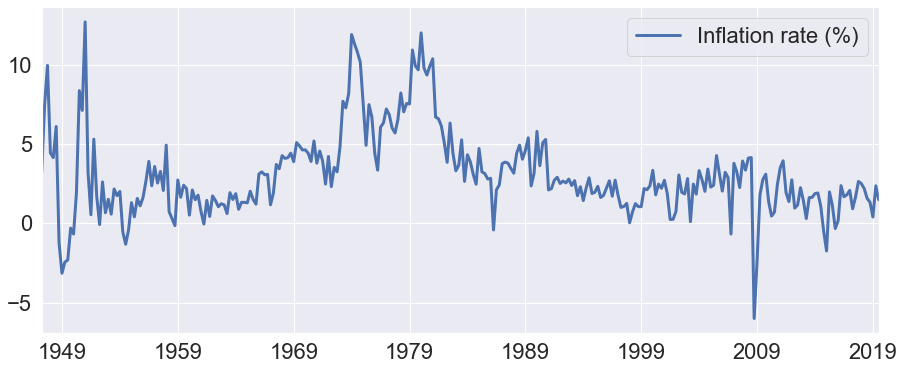

In [4]:
# inflation rate
fred = Fred(api_key='c61f0bb859e22e163419d6e5cf28655b') 
data = fred.get_series('PCECTPI').dropna()
CPI = pd.DataFrame(data,columns=['CPI'])
CPI
# calculate annualized quarterly inflation rate
Inflation = CPI.pct_change().dropna()*100*4 # unit:percent per annum
Inflation.columns = ['Inflation rate (%)']
Inflation = Inflation.resample('Q').mean()
Inflation
Inflation.plot(lw=3)

World Trade Uncertainty (WTU) index (GDP weighted average)
year                                                                  
1996-03-31                                           0.928470         
1996-06-30                                           0.663709         
1996-09-30                                           0.214940         
1996-12-31                                           0.133763         
1997-03-31                                           5.843631         
1997-06-30                                           0.440419         
1997-09-30                                           1.695299         
1997-12-31                                           0.000000         
1998-03-31                                           0.019861         
1998-06-30                                           1.772538         
1998-09-30                                           0.030374         
1998-12-31                                           0.083257         
1999-03-31                                           0.331405         
1999-06-30                                           0.575795         
1999-09-30                                           0.432782         
1999-12-31                                           0.044089         
2000-03-31                                           0.090494         
2000-06-30                                           0.052935         
2000-09-30                                           0.000000         
2000-12-31                                           0.481378         
2001-03-31                                           3.316836         
2001-06-30                                           1.776770         
2001-09-30                                           0.114308         
2001-12-31                                           0.332180         
2002-03-31                                           4.025399         
2002-06-30                                           0.232492         
2002-09-30                                           0.000000         
2002-12-31                                           0.253652         
2003-03-31                                           1.042763         
2003-06-30                                           0.560603         
...                                                       ...         
2012-06-30                                           0.305865         
2012-09-30                                           0.420708         
2012-12-31                                           0.367233         
2013-03-31                                           0.344465         
2013-06-30                                           0.604423         
2013-09-30                                           1.893394         
2013-12-31                                           0.415638         
2014-03-31                                           0.372489         
2014-06-30                                           1.399285         
2014-09-30                                           0.661757         
2014-12-31                                           0.043577         
2015-03-31                                           0.076916         
2015-06-30                                           0.150238         
2015-09-30                                           1.627139         
2015-12-31                                           1.287080         
2016-03-31                                           1.065143         
2016-06-30                                           1.258969         
2016-09-30                                           3.017774         
2016-12-31                                          14.286510         
2017-03-31                                           8.550531         
2017-06-30                                           3.462177         
2017-09-30                                           8.860320         
2017-12-31                                           5.127654         
2018-03-31                          

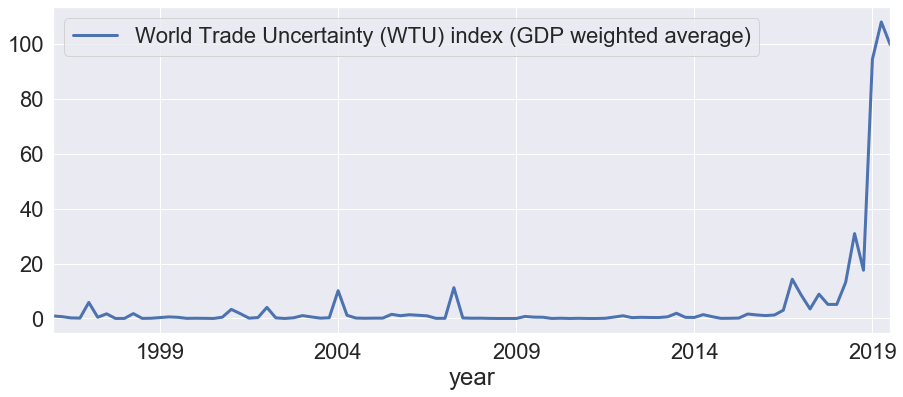

In [5]:
# world uncertainty index
WTUI = pd.read_excel('WUI_Data.xlsx',sheet_name = 'T8',usecols=[0,2]).iloc[:,:3] # F2 sheet select GDP weighted
WTUI.iloc[:,0] = pd.to_datetime(WTUI.iloc[:,0])
WTUI.iloc[:,1] = pd.to_numeric(WTUI.iloc[:,1])
WTUI = WTUI.set_index('year')
WTUI = WTUI.resample('Q').mean()
WTUI
WTUI.plot(lw=3)

In [6]:
# Equation 1-1
# create varibales
# regress dpi against pi(t)*dt and y(t)*dt
data1 = pd.concat([Inflation,output_gap],join='inner',axis=1)
begin = '1954-09-30'
end = '2019-06-30'
data1 = data1.loc[begin:end]
data1

Inflation rate (%)  Output Gap (% of GDP)
1954-09-30           -1.323430              -1.696618
1954-12-31           -0.406477              -0.360984
1955-03-31            1.302048               1.857851
1955-06-30            0.405570               2.889409
1955-09-30            1.566615               3.648519
1955-12-31            1.103114               3.629457
1956-03-31            1.636705               2.577843
1956-06-30            2.672189               2.771966
1956-09-30            3.902051               2.006452
1956-12-31            2.365931               2.974371
1957-03-31            3.580295               2.878425
1957-06-30            2.538367               1.830252
1957-09-30            3.268773               1.969053
1957-12-31            2.067909               0.034432
1958-03-31            4.927297              -3.449254
1958-06-30            0.727592              -3.710247
1958-09-30            0.300526              -2.401017
1958-12-31           -0.150150              -1.056754
1959-03-31            2.728752              -0.082061
1959-06-30            1.641077               1.229706
1959-09-30            2.402031               0.356642
1959-12-31            2.190769              -0.303127
1960-03-31            0.514107               0.957161
1960-06-30            2.102689              -0.564976
1960-09-30            1.483643              -1.056845
1960-12-31            1.768947              -3.291173
1961-03-31            0.747889              -3.596054
1961-06-30           -0.048161              -2.914593
1961-09-30            1.445000              -2.019668
1961-12-31            0.431940              -1.083851
...                        ...                    ...
2012-03-31            2.743273              -2.923136
2012-06-30            0.956419              -2.873204
2012-09-30            1.146568              -3.120867
2012-12-31            2.246607              -3.399415
2013-03-31            1.423120              -2.945101
2013-06-30            0.297083              -3.230644
2013-09-30            1.618888              -2.884472
2013-12-31            1.632074              -2.526109
2014-03-31            1.872792              -3.213266
2014-06-30            1.910959              -2.321828
2014-09-30            1.077339              -1.554048
2014-12-31           -0.508131              -1.428640
2015-03-31           -1.747709              -1.088975
2015-06-30            1.973825              -0.796962
2015-09-30            1.129571              -0.910018
2015-12-31           -0.332885              -1.315117
2016-03-31            0.170455              -1.250681
2016-06-30            2.373738              -1.206303
2016-09-30            1.670677              -1.087702
2016-12-31            1.794066              -1.007292
2017-03-31            2.072282              -0.861917
2017-06-30            0.915002              -0.752038
2017-09-30            1.655366              -0.396155
2017-12-31            2.640687               0.033653
2018-03-31            2.503443               0.202456
2018-06-30            2.186199               0.589182
2018-09-30            1.574249               0.821959
2018-12-31            1.324564               0.592021
2019-03-31            0.393484               0.848147
2019-06-30            2.362255               0.828815

[260 rows x 2 columns]

In [7]:
# run regression for miu,alpha1,alpha2s
dt = 0.25
X1 = np.array(data1.iloc[:-1,:])
y1 = np.array(data1.iloc[1:,0])
X1 = sm.add_constant(X1)
model = sm.OLS(y1, X1)
results_1 = model.fit()
print(results_1.summary())
miu_pi = results_1.params[0]
alpha1 = results_1.params[1]
alpha2 = results_1.params[2]
miu_pi = miu_pi/dt
miu_pi
alpha1 = (alpha1-1)/dt
alpha2 = alpha2/dt
alpha1
alpha2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     273.0
Date:                Mon, 06 Jan 2020   Prob (F-statistic):           3.36e-64
Time:                        14:25:03   Log-Likelihood:                -457.81
No. Observations:                 259   AIC:                             921.6
Df Residuals:                     256   BIC:                             932.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6357      0.144      4.409      0.0

2.5429561057972565

-0.7414399580081326

0.26334228565820567

In [8]:
# Equation 1-2
# create varibales
data2 = pd.concat([output_gap,Inflation,fed_rate_Q],join='inner',axis=1)
begin = '1954-09-30'
end = '2019-06-30'
data2 = data2.loc[begin:end]
data2
diff = data2.diff(axis=1).iloc[:,2]
diff

Output Gap (% of GDP)  Inflation rate (%)  federal funds rate (%)
Time                                                                         
1954-09-30              -1.696618           -1.323430                1.026667
1954-12-31              -0.360984           -0.406477                0.986667
1955-03-31               1.857851            1.302048                1.343333
1955-06-30               2.889409            0.405570                1.500000
1955-09-30               3.648519            1.566615                1.940000
1955-12-31               3.629457            1.103114                2.356667
1956-03-31               2.577843            1.636705                2.483333
1956-06-30               2.771966            2.672189                2.693333
1956-09-30               2.006452            3.902051                2.810000
1956-12-31               2.974371            2.365931                2.926667
1957-03-31               2.878425            3.580295                2.933333
1957-06-30               1.830252            2.538367                3.000000
1957-09-30               1.969053            3.268773                3.233333
1957-12-31               0.034432            2.067909                3.253333
1958-03-31              -3.449254            4.927297                1.863333
1958-06-30              -3.710247            0.727592                0.940000
1958-09-30              -2.401017            0.300526                1.323333
1958-12-31              -1.056754           -0.150150                2.163333
1959-03-31              -0.082061            2.728752                2.570000
1959-06-30               1.229706            1.641077                3.083333
1959-09-30               0.356642            2.402031                3.576667
1959-12-31              -0.303127            2.190769                3.990000
1960-03-31               0.957161            0.514107                3.933333
1960-06-30              -0.564976            2.102689                3.696667
1960-09-30              -1.056845            1.483643                2.936667
1960-12-31              -3.291173            1.768947                2.296667
1961-03-31              -3.596054            0.747889                2.003333
1961-06-30              -2.914593           -0.048161                1.733333
1961-09-30              -2.019668            1.445000                1.683333
1961-12-31              -1.083851            0.431940                2.400000
...                           ...                 ...                     ...
2012-03-31              -2.923136            2.743273                0.103333
2012-06-30              -2.873204            0.956419                0.153333
2012-09-30              -3.120867            1.146568                0.143333
2012-12-31              -3.399415            2.246607                0.160000
2013-03-31              -2.945101            1.423120                0.143333
2013-06-30              -3.230644            0.297083                0.116667
2013-09-30              -2.884472            1.618888                0.083333
2013-12-31              -2.526109            1.632074                0.086667
2014-03-31              -3.213266            1.872792                0.073333
2014-06-30              -2.321828            1.910959                0.093333
2014-09-30              -1.554048            1.077339                0.090000
2014-12-31              -1.428640           -0.508131                0.100000
2015-03-31              -1.088975           -1.747709                0.110000
2015-06-30              -0.796962            1.973825                0.123333
2015-09-30              -0.910018            1.129571                0.136667
2015-12-31              -1.315117           -0.332885                0.160000
2016-03-31              -1.250681            0.170455                0.360000
2016-06-30              -1.206303            2.373738                0.373333
2016-09-30              -1.087702 

Time
1954-09-30    2.350097
1954-12-31    1.393143
1955-03-31    0.041285
1955-06-30    1.094430
1955-09-30    0.373385
1955-12-31    1.253552
1956-03-31    0.846628
1956-06-30    0.021144
1956-09-30   -1.092051
1956-12-31    0.560736
1957-03-31   -0.646962
1957-06-30    0.461633
1957-09-30   -0.035440
1957-12-31    1.185424
1958-03-31   -3.063964
1958-06-30    0.212408
1958-09-30    1.022807
1958-12-31    2.313483
1959-03-31   -0.158752
1959-06-30    1.442257
1959-09-30    1.174636
1959-12-31    1.799231
1960-03-31    3.419226
1960-06-30    1.593977
1960-09-30    1.453023
1960-12-31    0.527720
1961-03-31    1.255444
1961-06-30    1.781494
1961-09-30    0.238334
1961-12-31    1.968060
                ...   
2012-03-31   -2.639940
2012-06-30   -0.803085
2012-09-30   -1.003235
2012-12-31   -2.086607
2013-03-31   -1.279786
2013-06-30   -0.180416
2013-09-30   -1.535555
2013-12-31   -1.545407
2014-03-31   -1.799458
2014-06-30   -1.817625
2014-09-30   -0.987339
2014-12-31    0.608131
2015-0

In [9]:
# run regression for miu,beta1,beta2
# regress y(t+dt) against y(t) and (i(t)-pi(t))
X1 = pd.concat([data2.iloc[:,0],diff],join='inner',axis=1)
X1 = np.array(X1.iloc[:-1,:])
y1 = np.array(data2.iloc[1:,0])
X1 = sm.add_constant(X1)
model = sm.OLS(y1, X1)
results_2 = model.fit()
print(results_2.summary())
miu_y = results_2.params[0]
miu_y = miu_y/dt
miu_y
beta1 = results_2.params[1]
beta2 = -results_2.params[2]
beta1 = (beta1-1)/dt
beta2 = beta2/dt
beta1
beta2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     928.0
Date:                Mon, 06 Jan 2020   Prob (F-statistic):          4.92e-118
Time:                        14:25:03   Log-Likelihood:                -314.05
No. Observations:                 259   AIC:                             634.1
Df Residuals:                     256   BIC:                             644.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0314      0.064      0.493      0.6

0.12557301596231474

-0.23976429962838175

0.15076866529892166

Inflation rate_yearly change (%)
1948-03-31                          6.400000
1948-06-30                          6.648850
1948-09-30                          6.296709
1948-12-31                          3.389962
1949-03-31                          1.450054
1949-06-30                         -0.205027
1949-09-30                         -2.273747
1949-12-31                         -2.040816
1950-03-31                         -1.429328
1950-06-30                         -0.342414
1950-09-30                          2.334303
1950-12-31                          4.235600
1951-03-31                          7.725948
1951-06-30                          8.070551
1951-09-30                          5.998055
1951-12-31                          5.525755
1952-03-31                          2.713482
1952-06-30                          1.872262
1952-09-30                          2.398928
1952-12-31                          1.225541
1953-03-31                          1.178755
1953-06-30                          1.345447
1953-09-30                          1.233377
1953-12-31                          1.506501
1954-03-31                          1.631031
1954-06-30                          1.348115
1954-09-30                          0.469643
1954-12-31                         -0.067769
1955-03-31                         -0.242751
1955-06-30                         -0.006752
...                                      ...
2012-06-30                          1.762402
2012-09-30                          1.562072
2012-12-31                          1.784341
2013-03-31                          1.450702
2013-06-30                          1.283876
2013-09-30                          1.403130
2013-12-31                          1.248211
2014-03-31                          1.361629
2014-06-30                          1.770288
2014-09-30                          1.633059
2014-12-31                          1.091480
2015-03-31                          0.180740
2015-06-30                          0.196410
2015-09-30                          0.209459
2015-12-31                          0.253418
2016-03-31                          0.736284
2016-06-30                          0.836503
2016-09-30                          0.972527
2016-12-31                          1.509883
2017-03-31                          1.992313
2017-06-30                          1.622558
2017-09-30                          1.618684
2017-12-31                          1.832805
2018-03-31                          1.942006
2018-06-30                          2.265237
2018-09-30                          2.244584
2018-12-31                          1.910374
2019-03-31                          1.376151
2019-06-30                          1.420528
2019-09-30                          1.397434

[287 rows x 1 columns]

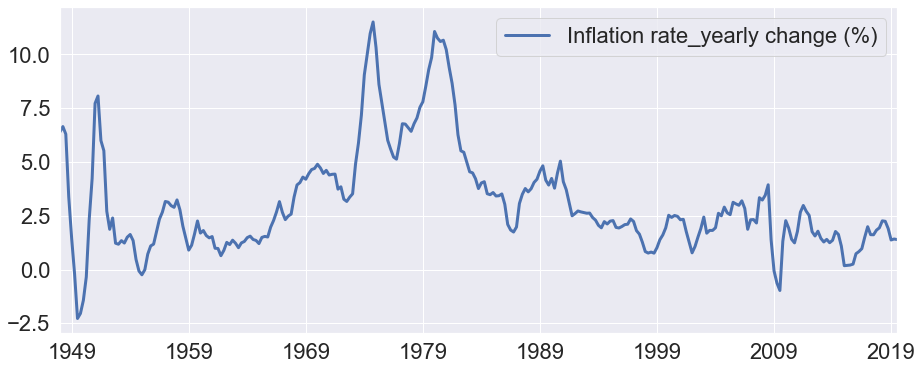

In [10]:
# Equation 6
# define inflation as the year-on-year change in the PCE deflator.
inflation2 = CPI.pct_change(periods=4).dropna()*100
inflation2.columns = ['Inflation rate_yearly change (%)']
inflation2 = inflation2.resample('Q').mean()
inflation2
inflation2.plot(lw=3)
# merge data
data3 = pd.concat([fed_rate_Q,inflation2,output_gap],join='inner',axis=1)
data3 = data3.loc['1996-03-31':,:]

In [11]:
# choose data from 1996Q1 to 2018Q4 for sliceduals
data_sliced = data3.loc['1996-03-31':'2018-12-31']    
data_sliced
# run regression to get c,theta3,theta2
X_sliced = data_sliced.iloc[:,1:3]
y_sliced = data_sliced.iloc[:,0]
X_sliced = sm.add_constant(X_sliced)
model = sm.OLS(y_sliced, X_sliced)
results_sliced = model.fit()
print(results_sliced.summary())
c = results_sliced.params[0]
theta1 = results_sliced.params[1]
theta2 = results_sliced.params[2]
c
theta1
theta2

federal funds rate (%)  Inflation rate_yearly change (%)  \
Time                                                                   
1996-03-31                5.363333                          2.000730   
1996-06-30                5.243333                          2.089581   
1996-09-30                5.306667                          2.108890   
1996-12-31                5.280000                          2.352762   
1997-03-31                5.276667                          2.236589   
1997-06-30                5.523333                          1.810431   
1997-09-30                5.533333                          1.646281   
1997-12-31                5.506667                          1.275693   
1998-03-31                5.520000                          0.838199   
1998-06-30                5.500000                          0.767662   
1998-09-30                5.533333                          0.813824   
1998-12-31                4.860000                          0.763247   
1999-03-31                4.733333                          1.019360   
1999-06-30                4.746667                          1.389111   
1999-09-30                5.093333                          1.610526   
1999-12-31                5.306667                          1.942660   
2000-03-31                5.676667                          2.525326   
2000-06-30                6.273333                          2.424895   
2000-09-30                6.520000                          2.515353   
2000-12-31                6.473333                          2.475903   
2001-03-31                5.593333                          2.316264   
2001-06-30                4.326667                          2.336706   
2001-09-30                3.496667                          1.767892   
2001-12-31                2.133333                          1.272690   
2002-03-31                1.733333                          0.778112   
2002-06-30                1.750000                          1.072749   
2002-09-30                1.740000                          1.506726   
2002-12-31                1.443333                          1.912582   
2003-03-31                1.250000                          2.440000   
2003-06-30                1.246667                          1.691238   
...                            ...                               ...   
2011-09-30                0.083333                          2.981050   
2011-12-31                0.073333                          2.711688   
2012-03-31                0.103333                          2.520316   
2012-06-30                0.153333                          1.762402   
2012-09-30                0.143333                          1.562072   
2012-12-31                0.160000                          1.784341   
2013-03-31                0.143333                          1.450702   
2013-06-30                0.116667                          1.283876   
2013-09-30                0.083333                          1.403130   
2013-12-31                0.086667                          1.248211   
2014-03-31                0.073333                          1.361629   
2014-06-30                0.093333                          1.770288   
2014-09-30                0.090000                          1.633059   
2014-12-31                0.100000                          1.091480   
2015-03-31                0.110000                          0.180740   
2015-06-30                0.123333                          0.196410   
2015-09-30                0.136667                          0.209459   
2015-12-31                0.160000                          0.253418   
2016-03-31                0.360000                          0.736284   
2016-06-30                0.373333                          0.836503   
2016-09-30                0.396667                          0.972527   
2016-12-31                0.450000                          1.509883   
2017-03-31                0.700000                  

                              OLS Regression Results                              
Dep. Variable:     federal funds rate (%)   R-squared:                       0.636
Model:                                OLS   Adj. R-squared:                  0.628
Method:                     Least Squares   F-statistic:                     77.79
Date:                    Mon, 06 Jan 2020   Prob (F-statistic):           2.90e-20
Time:                            14:25:04   Log-Likelihood:                -157.49
No. Observations:                      92   AIC:                             321.0
Df Residuals:                          89   BIC:                             328.5
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


2.917978494645339

0.24485270322846478

0.8680761386387604

Time
1996-03-31    2.754536
1996-06-30    1.804069
1996-09-30    1.741674
1996-12-31    1.447023
1997-03-31    1.653169
1997-06-30    1.354530
1997-09-30    1.139166
1997-12-31    1.304587
1998-03-31    1.425816
1998-06-30    1.507484
1998-09-30    1.343982
1998-12-31    0.190811
1999-03-31    0.089586
1999-06-30    0.272338
1999-09-30    0.353313
1999-12-31   -0.072742
2000-03-31    0.757336
2000-06-30    0.687326
2000-09-30    1.686975
2000-12-31    1.961926
2001-03-31    2.175844
2001-06-30    1.151399
2001-09-30    1.530635
2001-12-31    0.729578
2002-03-31    0.342870
2002-06-30    0.375247
2002-09-30    0.462045
2002-12-31    0.497819
2003-03-31    0.270276
2003-06-30    0.277882
                ...   
2011-09-30    0.002722
2011-12-31   -0.615391
2012-03-31   -0.894247
2012-06-30   -0.702014
2012-09-30   -0.447973
2012-12-31   -0.243929
2013-03-31   -0.573282
2013-06-30   -0.311227
2013-09-30   -0.674264
2013-12-31   -0.944085
2014-03-31   -0.388684
2014-06-30   -1.242581
2014-0

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Residuals(%)')

Text(0.5, 1.0, 'Residuals of the Standard Taylor Rule')

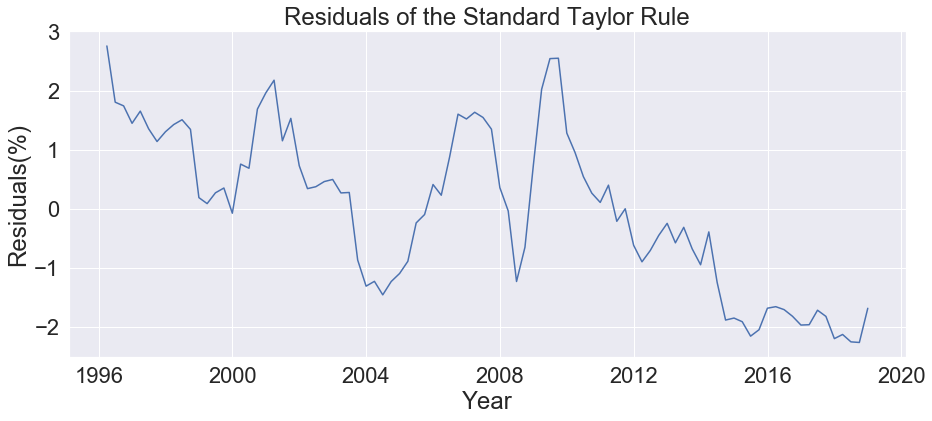

residuals  \
Time                    
1996-03-31   2.754536   
1996-06-30   1.804069   
1996-09-30   1.741674   
1996-12-31   1.447023   
1997-03-31   1.653169   
1997-06-30   1.354530   
1997-09-30   1.139166   
1997-12-31   1.304587   
1998-03-31   1.425816   
1998-06-30   1.507484   
1998-09-30   1.343982   
1998-12-31   0.190811   
1999-03-31   0.089586   
1999-06-30   0.272338   
1999-09-30   0.353313   
1999-12-31  -0.072742   
2000-03-31   0.757336   
2000-06-30   0.687326   
2000-09-30   1.686975   
2000-12-31   1.961926   
2001-03-31   2.175844   
2001-06-30   1.151399   
2001-09-30   1.530635   
2001-12-31   0.729578   
2002-03-31   0.342870   
2002-06-30   0.375247   
2002-09-30   0.462045   
2002-12-31   0.497819   
2003-03-31   0.270276   
2003-06-30   0.277882   
...               ...   
2011-09-30   0.002722   
2011-12-31  -0.615391   
2012-03-31  -0.894247   
2012-06-30  -0.702014   
2012-09-30  -0.447973   
2012-12-31  -0.243929   
2013-03-31  -0.573282   
2013-06-30  -0.311227   
2013-09-30  -0.674264   
2013-12-31  -0.944085   
2014-03-31  -0.388684   
2014-06-30  -1.242581   
2014-09-30  -1.878806   
2014-12-31  -1.845062   
2015-03-31  -1.906920   
2015-06-30  -2.150913   
2015-09-30  -2.042633   
2015-12-31  -1.678407   
2016-03-31  -1.652574   
2016-06-30  -1.702302   
2016-09-30  -1.815230   
2016-12-31  -1.963271   
2017-03-31  -1.957593   
2017-06-30  -1.712440   
2017-09-30  -1.817092   
2017-12-31  -2.192626   
2018-03-31  -2.122565   
2018-06-30  -2.247416   
2018-09-30  -2.257761   
2018-12-31  -1.679658   

            World Trade Uncertainty (WTU) index (GDP weighted average)  
Time                                                                    
1996-03-31                                           0.928470           
1996-06-30                                           0.663709           
1996-09-30                                           0.214940           
1996-12-31                                           0.133763           
1997-03-31                                           5.843631           
1997-06-30                                           0.440419           
1997-09-30                                           1.695299           
1997-12-31                                           0.000000           
1998-03-31                                           0.019861           
1998-06-30                                           1.772538           
1998-09-30                                           0.030374           
1998-12-31                                           0.083257           
1999-03-31                                           0.331405           
1999-06-30                                           0.575795           
1999-09-30                                           0.432782           
1999-12-31                                           0.044089           
2000-03-31                                           0.090494           
2000-06-30                                           0.052935           
2000-09-30                                           0.000000           
2000-12-31                                           0.481378           
2001-03-31                                           3.316836           
2001-06-30                                           1.776770           
2001-09-30                                           0.114308           
2001-12-31                                           0.332180           
2002-03-31                                           4.025399           
2002-06-30                                           0.232492           
2002-09-30                                           0.000000           
2002-12-31                                           0.253652           
2003-03-31                                           1.042763           
2003-06-30                                           0.560603           
...                                                       ...           
2011-09-30                 

In [12]:
# get the residuals
resid = y_sliced - results_sliced.predict()
resid

# plot the residuals
plt.plot(data_sliced.index,resid)
plt.xlabel('Year')
plt.ylabel('Residuals(%)')
plt.title("Residuals of the Standard Taylor Rule")
plt.show()

# merge WTUI with residuals
data_WTUI = pd.concat([resid,WTUI],join='inner',axis=1)
data_WTUI = data_WTUI.rename(columns={'federal funds rate (%)':'residuals'})
data_WTUI

In [13]:
# regress residuals against WTUI,(WTUI)_t-1, (WTUI)_t-2 
X_WTUI = pd.DataFrame()
X_WTUI['WTUI_t'] = data_WTUI.iloc[2:,1]
X_WTUI['WTUI_t-1'] = np.array(data_WTUI.iloc[1:-1,1])
X_WTUI['WTUI_t-2'] = np.array(data_WTUI.iloc[:-2,1])
y_WTUI = np.array(data_WTUI.iloc[2:,0])
X_WTUI = sm.add_constant(X_WTUI)
model = sm.OLS(y_WTUI, X_WTUI)
results_4 = model.fit()
print(results_4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     5.939
Date:                Mon, 06 Jan 2020   Prob (F-statistic):           0.000991
Time:                        14:25:05   Log-Likelihood:                -143.46
No. Observations:                  90   AIC:                             294.9
Df Residuals:                      86   BIC:                             304.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2574      0.149      1.734      0.0

In [14]:
# run regression of standard Taylor rule model
data3
X_3 = data3.iloc[:,1:3]
y_3 = data3.iloc[:,0]
X_3 = sm.add_constant(X_3)
model = sm.OLS(y_3, X_3)
results_3 = model.fit()
print(results_3.summary())

federal funds rate (%)  Inflation rate_yearly change (%)  \
Time                                                                   
1996-03-31                5.363333                          2.000730   
1996-06-30                5.243333                          2.089581   
1996-09-30                5.306667                          2.108890   
1996-12-31                5.280000                          2.352762   
1997-03-31                5.276667                          2.236589   
1997-06-30                5.523333                          1.810431   
1997-09-30                5.533333                          1.646281   
1997-12-31                5.506667                          1.275693   
1998-03-31                5.520000                          0.838199   
1998-06-30                5.500000                          0.767662   
1998-09-30                5.533333                          0.813824   
1998-12-31                4.860000                          0.763247   
1999-03-31                4.733333                          1.019360   
1999-06-30                4.746667                          1.389111   
1999-09-30                5.093333                          1.610526   
1999-12-31                5.306667                          1.942660   
2000-03-31                5.676667                          2.525326   
2000-06-30                6.273333                          2.424895   
2000-09-30                6.520000                          2.515353   
2000-12-31                6.473333                          2.475903   
2001-03-31                5.593333                          2.316264   
2001-06-30                4.326667                          2.336706   
2001-09-30                3.496667                          1.767892   
2001-12-31                2.133333                          1.272690   
2002-03-31                1.733333                          0.778112   
2002-06-30                1.750000                          1.072749   
2002-09-30                1.740000                          1.506726   
2002-12-31                1.443333                          1.912582   
2003-03-31                1.250000                          2.440000   
2003-06-30                1.246667                          1.691238   
...                            ...                               ...   
2012-03-31                0.103333                          2.520316   
2012-06-30                0.153333                          1.762402   
2012-09-30                0.143333                          1.562072   
2012-12-31                0.160000                          1.784341   
2013-03-31                0.143333                          1.450702   
2013-06-30                0.116667                          1.283876   
2013-09-30                0.083333                          1.403130   
2013-12-31                0.086667                          1.248211   
2014-03-31                0.073333                          1.361629   
2014-06-30                0.093333                          1.770288   
2014-09-30                0.090000                          1.633059   
2014-12-31                0.100000                          1.091480   
2015-03-31                0.110000                          0.180740   
2015-06-30                0.123333                          0.196410   
2015-09-30                0.136667                          0.209459   
2015-12-31                0.160000                          0.253418   
2016-03-31                0.360000                          0.736284   
2016-06-30                0.373333                          0.836503   
2016-09-30                0.396667                          0.972527   
2016-12-31                0.450000                          1.509883   
2017-03-31                0.700000                          1.992313   
2017-06-30                0.950000                          1.622558   
2017-09-30                1.153333                  

                              OLS Regression Results                              
Dep. Variable:     federal funds rate (%)   R-squared:                       0.626
Model:                                OLS   Adj. R-squared:                  0.617
Method:                     Least Squares   F-statistic:                     76.03
Date:                    Mon, 06 Jan 2020   Prob (F-statistic):           3.86e-20
Time:                            14:25:05   Log-Likelihood:                -161.24
No. Observations:                      94   AIC:                             328.5
Df Residuals:                          91   BIC:                             336.1
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Fed Funds Rates(%)')

Text(0.5, 1.0, 'Forecast vs Actuals Fed Funds Rate (Standard Taylor Rule)')

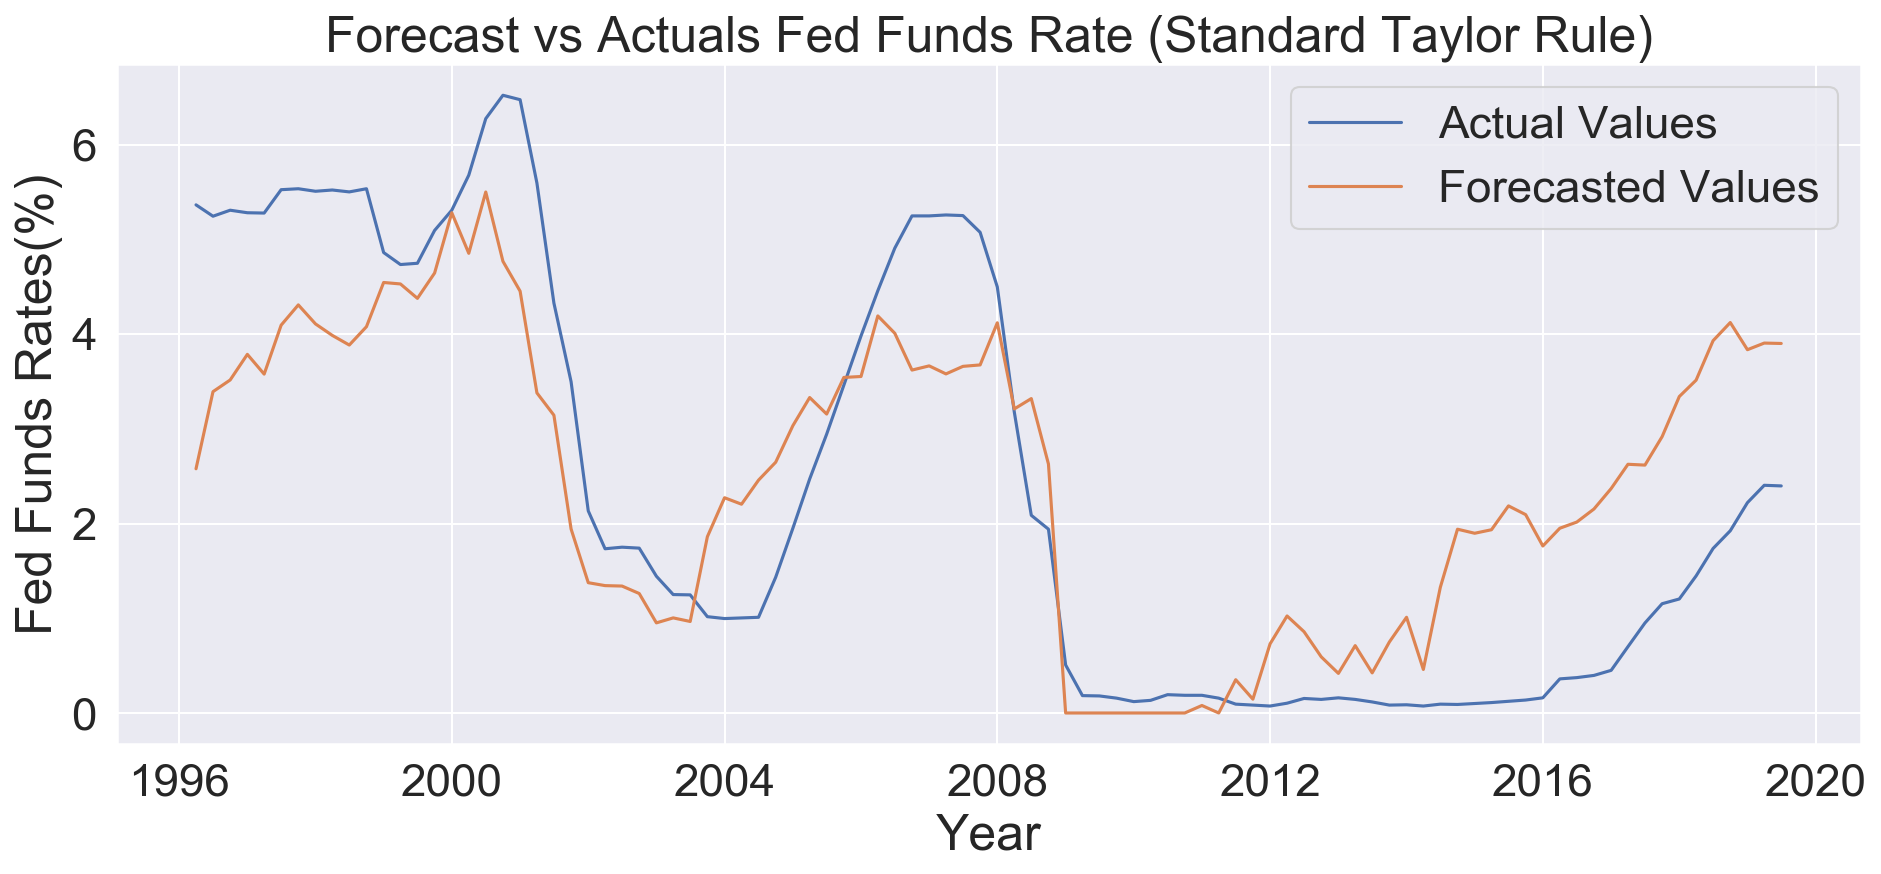

In [15]:
# plot the actual vs. predicted values (standard taylor rule)
predict1_fed = []
for value in results_3.predict():
    if value<0:
        predict1_fed.append(0)
    else:
        predict1_fed.append(value)
predict1_fed = pd.DataFrame(predict1_fed,columns={'predictions_standard'})
predict1_fed.index = data3.index
fig, ax = plt.subplots(dpi=150)
plt.plot(data3.index,data3.iloc[:,0])
plt.plot(data3.index,predict1_fed)
plt.gca().legend(('Actual Values','Forecasted Values'))
plt.xlabel('Year')
plt.ylabel('Fed Funds Rates(%)')
plt.title("Forecast vs Actuals Fed Funds Rate (Standard Taylor Rule)")
plt.show()

In [16]:
# average WTUI
def WTUI_average(d,WTUI):
    WTUI_max = 2

    # calculate WTUI_avg
    n = WTUI.iloc[:,0].shape[0]
    WTUI_avg = np.zeros(n)
    for i in range(0,d):
        WTUI_avg[i] = sum(WTUI.iloc[:i+1,0])*1/(1+i)

    for i in range(d,n):
        equation = sum(WTUI.iloc[i-d+1:i+1,0])*1/d
        WTUI_avg[i] = equation

    WTUI_avg = pd.DataFrame(WTUI_avg,columns={'WTUI_avg'})
    WTUI_avg.index = WTUI.index
    return WTUI_avg

In [17]:
# generate WTUI_avg-WTUI_max with changing point
def regression_data(WTUI_max,change_date1,change_date2):

    WTUI_diff = pd.DataFrame(np.array(WTUI_avg)-WTUI_max,columns = {'WTUI_avg-WTUI_max'})
    WTUI_diff.index = WTUI.index
    WTUI_1 = WTUI_diff.copy()
    WTUI_1.loc[change_date1:,:] = 0
    WTUI_1 = WTUI_1.rename(columns={'WTUI_avg-WTUI_max':'WTUI_avg-WTUI_max (t<k)'})

    WTUI_2 = WTUI_diff.copy()
    WTUI_2.loc[:change_date2,:] = 0
    WTUI_2 = WTUI_2.rename(columns={'WTUI_avg-WTUI_max':'WTUI_avg-WTUI_max (t>=k)'})

    data = pd.concat([data3,WTUI_1,WTUI_2],join='inner',axis=1)
    return data

In [18]:
# test beta3 = beta3'
def regression_result(data):
    X4 = data.iloc[:,1:]
    y4 = data.iloc[:,0]
    X4 = sm.add_constant(X4)
    model = sm.OLS(y4, X4)
    results = model.fit()
    print(results.summary())

    # test beta3 = beta3'
    r = np.zeros_like(results.params)
    r[3:] = [1,-1]
    print(r)
    T_test = results.t_test(r)
    print(T_test)
    
    return results

In [19]:
# plot the actual vs. modified talyor rule
def plot_forecast(results,predict1_fed,data):
    predicted = results.predict()
    predict2_fed = []
    for value in predicted:
        if value<0:
            predict2_fed.append(0)
        else:
            predict2_fed.append(value)
    predict2_fed = pd.DataFrame(predict2_fed,columns={'predictions_modified'})
    predict2_fed.index = data.index
    data_comb = pd.concat([data.iloc[:,0],predict1_fed,predict2_fed],join='inner',axis=1)
    data_comb
    fig, ax = plt.subplots(dpi=150)
    plt.plot(data.index,data_comb.iloc[:,0])
    plt.plot(data.index,data_comb.iloc[:,1])
    plt.plot(data.index,data_comb.iloc[:,2])
    plt.gca().legend(('Actual Values','Forecasted Values_Standard','Forecasted Values_Modified'))
    plt.xlabel('Year')
    plt.ylabel('Fed Funds Rates(%)')
    plt.title("Forecasted vs Actual Fed Funds Rate")
    plt.show()

#### 1. get WTUI average using 8 quarter avg

WTUI_avg
year                 
1996-03-31   0.928470
1996-06-30   0.796090
1996-09-30   0.602373
1996-12-31   0.485220
1997-03-31   1.556902
1997-06-30   1.370822
1997-09-30   1.417176
1997-12-31   1.240029
1998-03-31   1.126453
1998-06-30   1.265056
1998-09-30   1.241986
1998-12-31   1.235672
1999-03-31   0.546644
1999-06-30   0.563566
1999-09-30   0.405752
1999-12-31   0.411263
2000-03-31   0.420092
2000-06-30   0.205141
2000-09-30   0.201345
2000-12-31   0.251110
2001-03-31   0.624289
2001-06-30   0.774410
2001-09-30   0.734601
2001-12-31   0.770613
2002-03-31   1.262476
2002-06-30   1.284920
2002-09-30   1.284920
2002-12-31   1.256455
2003-03-31   0.972195
2003-06-30   0.820175
...               ...
2012-06-30   0.244927
2012-09-30   0.297516
2012-12-31   0.335078
2013-03-31   0.378136
2013-06-30   0.453689
2013-09-30   0.681212
2013-12-31   0.667670
2014-03-31   0.590527
2014-06-30   0.727204
2014-09-30   0.757336
2014-12-31   0.716879
2015-03-31   0.683435
2015-06-30   0.626662
2015-09-30   0.593380
2015-12-31   0.702310
2016-03-31   0.788892
2016-06-30   0.771353
2016-09-30   1.065855
2016-12-31   2.846221
2017-03-31   3.905423
2017-06-30   4.319415
2017-09-30   5.223563
2017-12-31   5.703635
2018-03-31   6.208821
2018-06-30   7.698167
2018-09-30  11.183434
2018-12-31  11.593680
2019-03-31  22.314177
2019-06-30  35.373268
2019-09-30  46.724958

[95 rows x 1 columns]

federal funds rate (%)  Inflation rate_yearly change (%)  \
Time                                                                   
1996-03-31                5.363333                          2.000730   
1996-06-30                5.243333                          2.089581   
1996-09-30                5.306667                          2.108890   
1996-12-31                5.280000                          2.352762   
1997-03-31                5.276667                          2.236589   
1997-06-30                5.523333                          1.810431   
1997-09-30                5.533333                          1.646281   
1997-12-31                5.506667                          1.275693   
1998-03-31                5.520000                          0.838199   
1998-06-30                5.500000                          0.767662   
1998-09-30                5.533333                          0.813824   
1998-12-31                4.860000                          0.763247   
1999-03-31                4.733333                          1.019360   
1999-06-30                4.746667                          1.389111   
1999-09-30                5.093333                          1.610526   
1999-12-31                5.306667                          1.942660   
2000-03-31                5.676667                          2.525326   
2000-06-30                6.273333                          2.424895   
2000-09-30                6.520000                          2.515353   
2000-12-31                6.473333                          2.475903   
2001-03-31                5.593333                          2.316264   
2001-06-30                4.326667                          2.336706   
2001-09-30                3.496667                          1.767892   
2001-12-31                2.133333                          1.272690   
2002-03-31                1.733333                          0.778112   
2002-06-30                1.750000                          1.072749   
2002-09-30                1.740000                          1.506726   
2002-12-31                1.443333                          1.912582   
2003-03-31                1.250000                          2.440000   
2003-06-30                1.246667                          1.691238   
...                            ...                               ...   
2012-03-31                0.103333                          2.520316   
2012-06-30                0.153333                          1.762402   
2012-09-30                0.143333                          1.562072   
2012-12-31                0.160000                          1.784341   
2013-03-31                0.143333                          1.450702   
2013-06-30                0.116667                          1.283876   
2013-09-30                0.083333                          1.403130   
2013-12-31                0.086667                          1.248211   
2014-03-31                0.073333                          1.361629   
2014-06-30                0.093333                          1.770288   
2014-09-30                0.090000                          1.633059   
2014-12-31                0.100000                          1.091480   
2015-03-31                0.110000                          0.180740   
2015-06-30                0.123333                          0.196410   
2015-09-30                0.136667                          0.209459   
2015-12-31                0.160000                          0.253418   
2016-03-31                0.360000                          0.736284   
2016-06-30                0.373333                          0.836503   
2016-09-30                0.396667                          0.972527   
2016-12-31                0.450000                          1.509883   
2017-03-31                0.700000                          1.992313   
2017-06-30                0.950000                          1.622558   
2017-09-30                1.153333                  

                              OLS Regression Results                              
Dep. Variable:     federal funds rate (%)   R-squared:                       0.684
Model:                                OLS   Adj. R-squared:                  0.670
Method:                     Least Squares   F-statistic:                     48.11
Date:                    Mon, 06 Jan 2020   Prob (F-statistic):           1.77e-21
Time:                            14:25:06   Log-Likelihood:                -153.31
No. Observations:                      94   AIC:                             316.6
Df Residuals:                          89   BIC:                             329.3
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

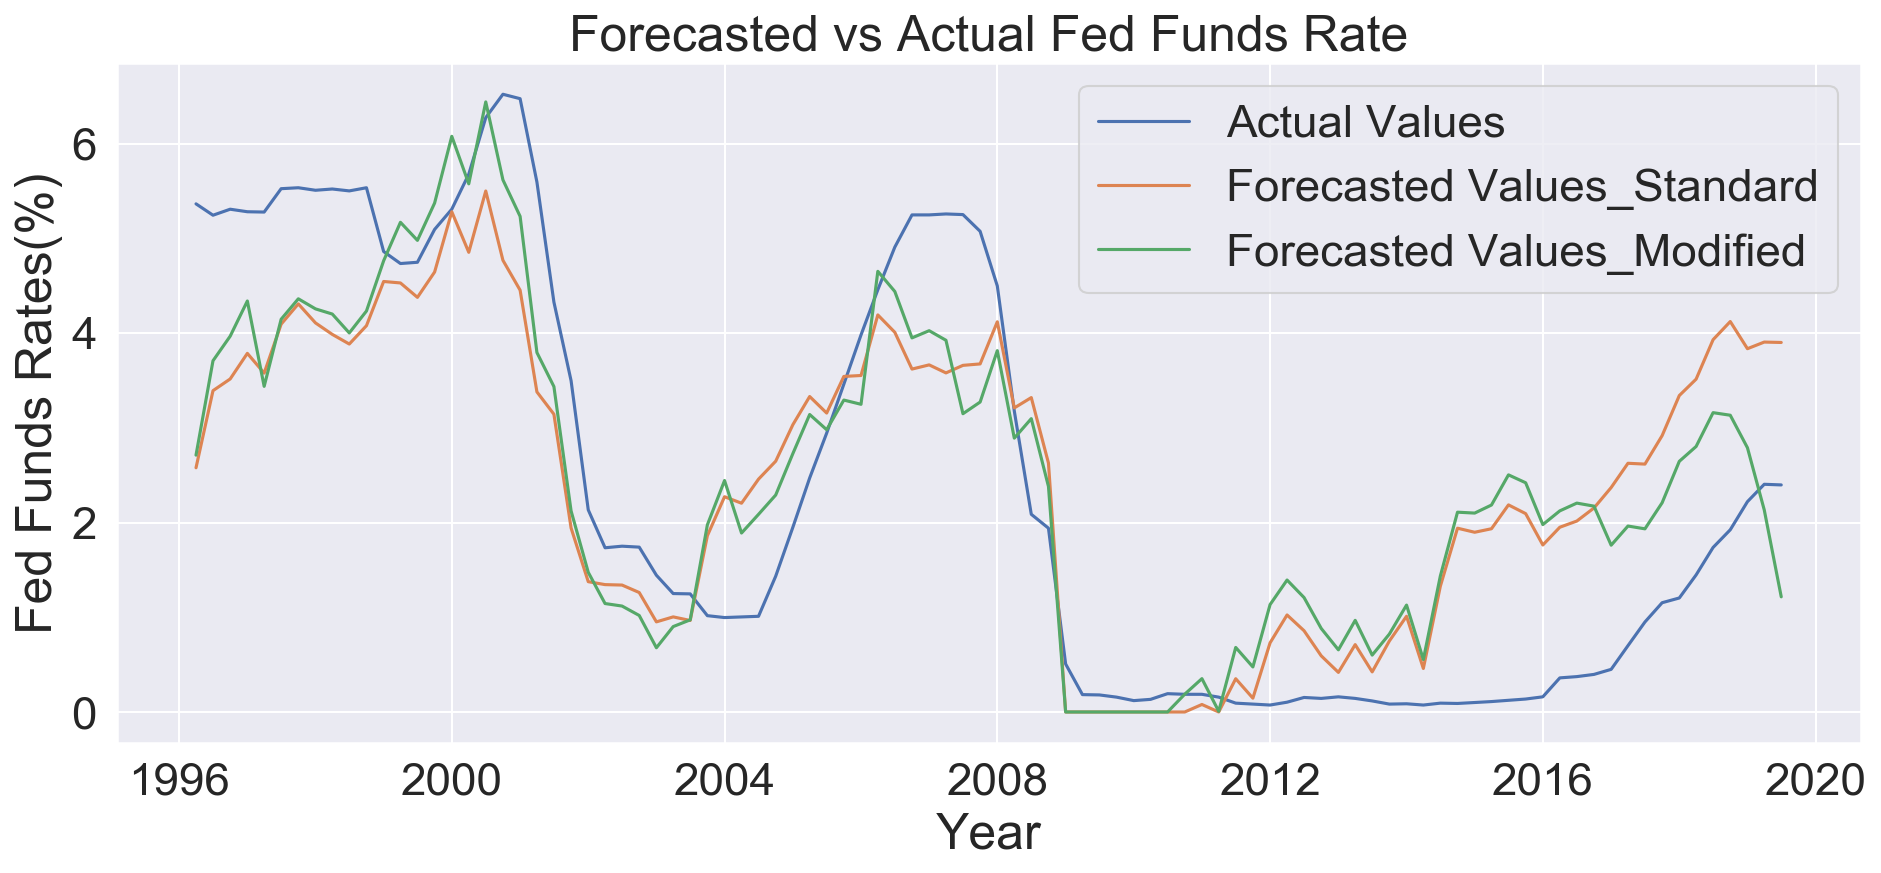

In [20]:
# average WTUI in the past 8 qurters
WTUI_avg = WTUI_average(8,WTUI)
WTUI_avg
# WTUI_max = 2, change date = 2016-Q4
data4 = regression_data(2,'2016-12-31','2016-09-30')
data4
# run the regression  
results_5 = regression_result(data4)
# plot the forecast vs. actual
plot_forecast(results_5,predict1_fed,data4)

federal funds rate (%)  Inflation rate_yearly change (%)  \
Time                                                                   
1996-03-31                5.363333                          2.000730   
1996-06-30                5.243333                          2.089581   
1996-09-30                5.306667                          2.108890   
1996-12-31                5.280000                          2.352762   
1997-03-31                5.276667                          2.236589   
1997-06-30                5.523333                          1.810431   
1997-09-30                5.533333                          1.646281   
1997-12-31                5.506667                          1.275693   
1998-03-31                5.520000                          0.838199   
1998-06-30                5.500000                          0.767662   
1998-09-30                5.533333                          0.813824   
1998-12-31                4.860000                          0.763247   
1999-03-31                4.733333                          1.019360   
1999-06-30                4.746667                          1.389111   
1999-09-30                5.093333                          1.610526   
1999-12-31                5.306667                          1.942660   
2000-03-31                5.676667                          2.525326   
2000-06-30                6.273333                          2.424895   
2000-09-30                6.520000                          2.515353   
2000-12-31                6.473333                          2.475903   
2001-03-31                5.593333                          2.316264   
2001-06-30                4.326667                          2.336706   
2001-09-30                3.496667                          1.767892   
2001-12-31                2.133333                          1.272690   
2002-03-31                1.733333                          0.778112   
2002-06-30                1.750000                          1.072749   
2002-09-30                1.740000                          1.506726   
2002-12-31                1.443333                          1.912582   
2003-03-31                1.250000                          2.440000   
2003-06-30                1.246667                          1.691238   
...                            ...                               ...   
2012-03-31                0.103333                          2.520316   
2012-06-30                0.153333                          1.762402   
2012-09-30                0.143333                          1.562072   
2012-12-31                0.160000                          1.784341   
2013-03-31                0.143333                          1.450702   
2013-06-30                0.116667                          1.283876   
2013-09-30                0.083333                          1.403130   
2013-12-31                0.086667                          1.248211   
2014-03-31                0.073333                          1.361629   
2014-06-30                0.093333                          1.770288   
2014-09-30                0.090000                          1.633059   
2014-12-31                0.100000                          1.091480   
2015-03-31                0.110000                          0.180740   
2015-06-30                0.123333                          0.196410   
2015-09-30                0.136667                          0.209459   
2015-12-31                0.160000                          0.253418   
2016-03-31                0.360000                          0.736284   
2016-06-30                0.373333                          0.836503   
2016-09-30                0.396667                          0.972527   
2016-12-31                0.450000                          1.509883   
2017-03-31                0.700000                          1.992313   
2017-06-30                0.950000                          1.622558   
2017-09-30                1.153333                  

                              OLS Regression Results                              
Dep. Variable:     federal funds rate (%)   R-squared:                       0.721
Model:                                OLS   Adj. R-squared:                  0.708
Method:                     Least Squares   F-statistic:                     57.40
Date:                    Mon, 06 Jan 2020   Prob (F-statistic):           7.45e-24
Time:                            14:25:06   Log-Likelihood:                -147.48
No. Observations:                      94   AIC:                             305.0
Df Residuals:                          89   BIC:                             317.7
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

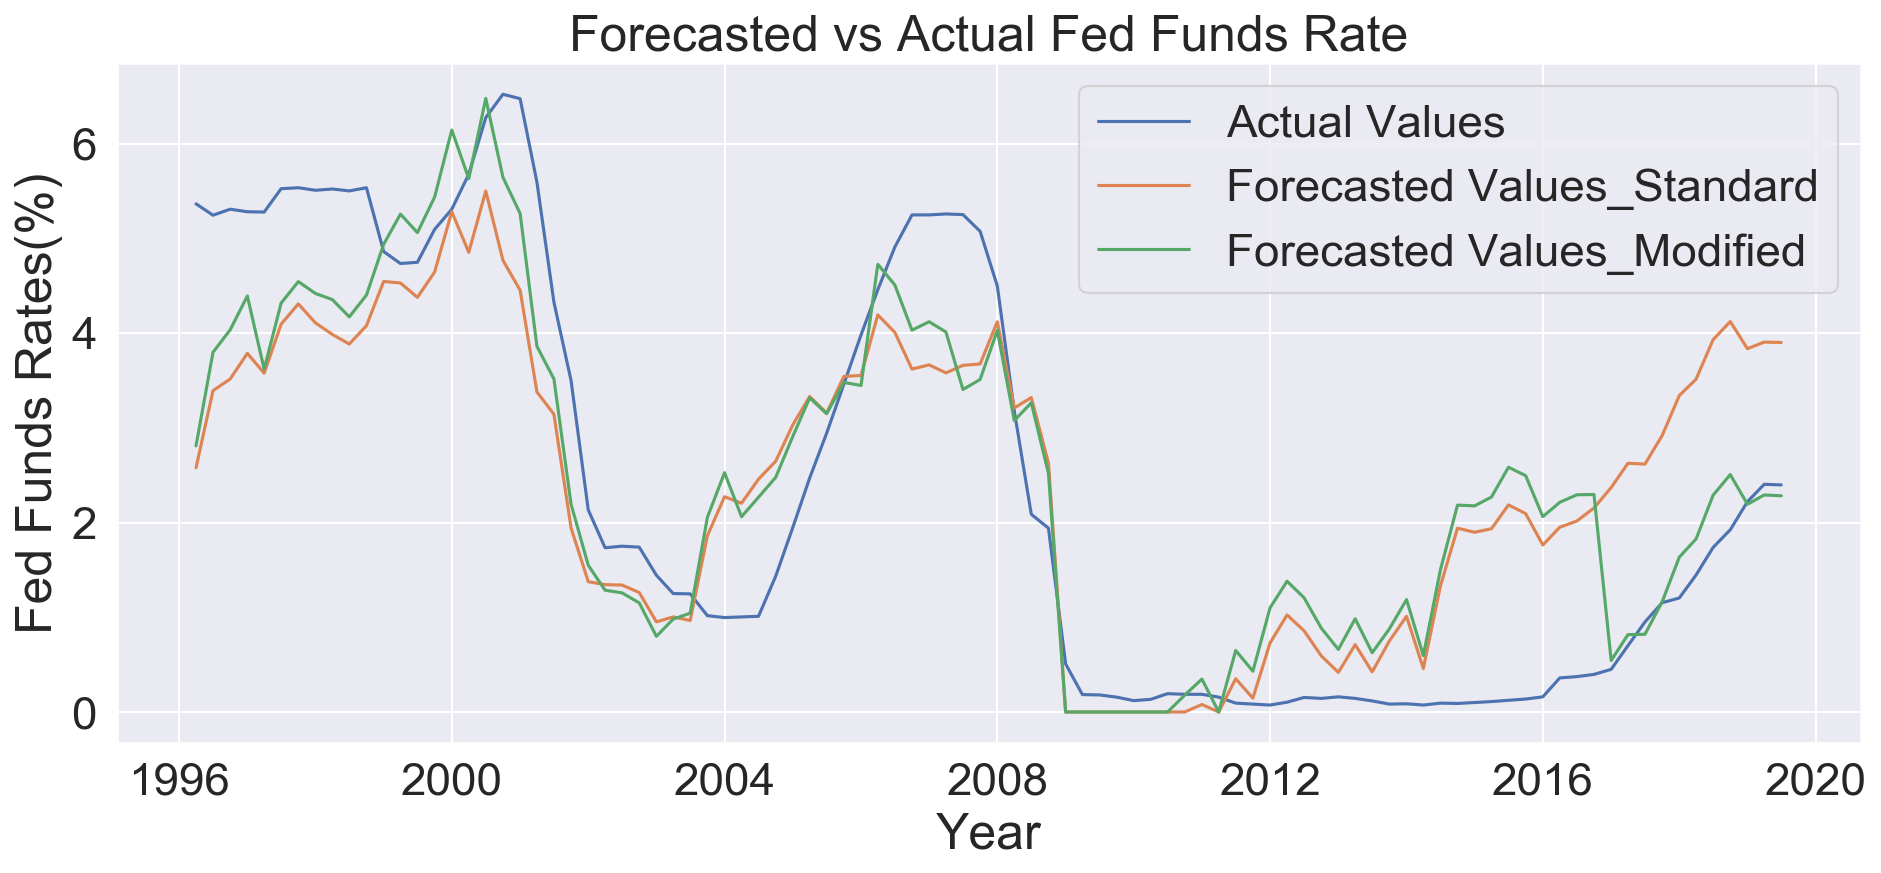

In [21]:
# WTUI_max = 5, change date = 2016-Q4
data4 = regression_data(5,'2016-12-31','2016-09-30')
data4
# run the regression  
results_5 = regression_result(data4)
# plot the forecast vs. actual
plot_forecast(results_5,predict1_fed,data4)

federal funds rate (%)  Inflation rate_yearly change (%)  \
Time                                                                   
1996-03-31                5.363333                          2.000730   
1996-06-30                5.243333                          2.089581   
1996-09-30                5.306667                          2.108890   
1996-12-31                5.280000                          2.352762   
1997-03-31                5.276667                          2.236589   
1997-06-30                5.523333                          1.810431   
1997-09-30                5.533333                          1.646281   
1997-12-31                5.506667                          1.275693   
1998-03-31                5.520000                          0.838199   
1998-06-30                5.500000                          0.767662   
1998-09-30                5.533333                          0.813824   
1998-12-31                4.860000                          0.763247   
1999-03-31                4.733333                          1.019360   
1999-06-30                4.746667                          1.389111   
1999-09-30                5.093333                          1.610526   
1999-12-31                5.306667                          1.942660   
2000-03-31                5.676667                          2.525326   
2000-06-30                6.273333                          2.424895   
2000-09-30                6.520000                          2.515353   
2000-12-31                6.473333                          2.475903   
2001-03-31                5.593333                          2.316264   
2001-06-30                4.326667                          2.336706   
2001-09-30                3.496667                          1.767892   
2001-12-31                2.133333                          1.272690   
2002-03-31                1.733333                          0.778112   
2002-06-30                1.750000                          1.072749   
2002-09-30                1.740000                          1.506726   
2002-12-31                1.443333                          1.912582   
2003-03-31                1.250000                          2.440000   
2003-06-30                1.246667                          1.691238   
...                            ...                               ...   
2012-03-31                0.103333                          2.520316   
2012-06-30                0.153333                          1.762402   
2012-09-30                0.143333                          1.562072   
2012-12-31                0.160000                          1.784341   
2013-03-31                0.143333                          1.450702   
2013-06-30                0.116667                          1.283876   
2013-09-30                0.083333                          1.403130   
2013-12-31                0.086667                          1.248211   
2014-03-31                0.073333                          1.361629   
2014-06-30                0.093333                          1.770288   
2014-09-30                0.090000                          1.633059   
2014-12-31                0.100000                          1.091480   
2015-03-31                0.110000                          0.180740   
2015-06-30                0.123333                          0.196410   
2015-09-30                0.136667                          0.209459   
2015-12-31                0.160000                          0.253418   
2016-03-31                0.360000                          0.736284   
2016-06-30                0.373333                          0.836503   
2016-09-30                0.396667                          0.972527   
2016-12-31                0.450000                          1.509883   
2017-03-31                0.700000                          1.992313   
2017-06-30                0.950000                          1.622558   
2017-09-30                1.153333                  

                              OLS Regression Results                              
Dep. Variable:     federal funds rate (%)   R-squared:                       0.705
Model:                                OLS   Adj. R-squared:                  0.692
Method:                     Least Squares   F-statistic:                     53.16
Date:                    Fri, 22 Nov 2019   Prob (F-statistic):           8.35e-23
Time:                            16:13:03   Log-Likelihood:                -150.05
No. Observations:                      94   AIC:                             310.1
Df Residuals:                          89   BIC:                             322.8
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

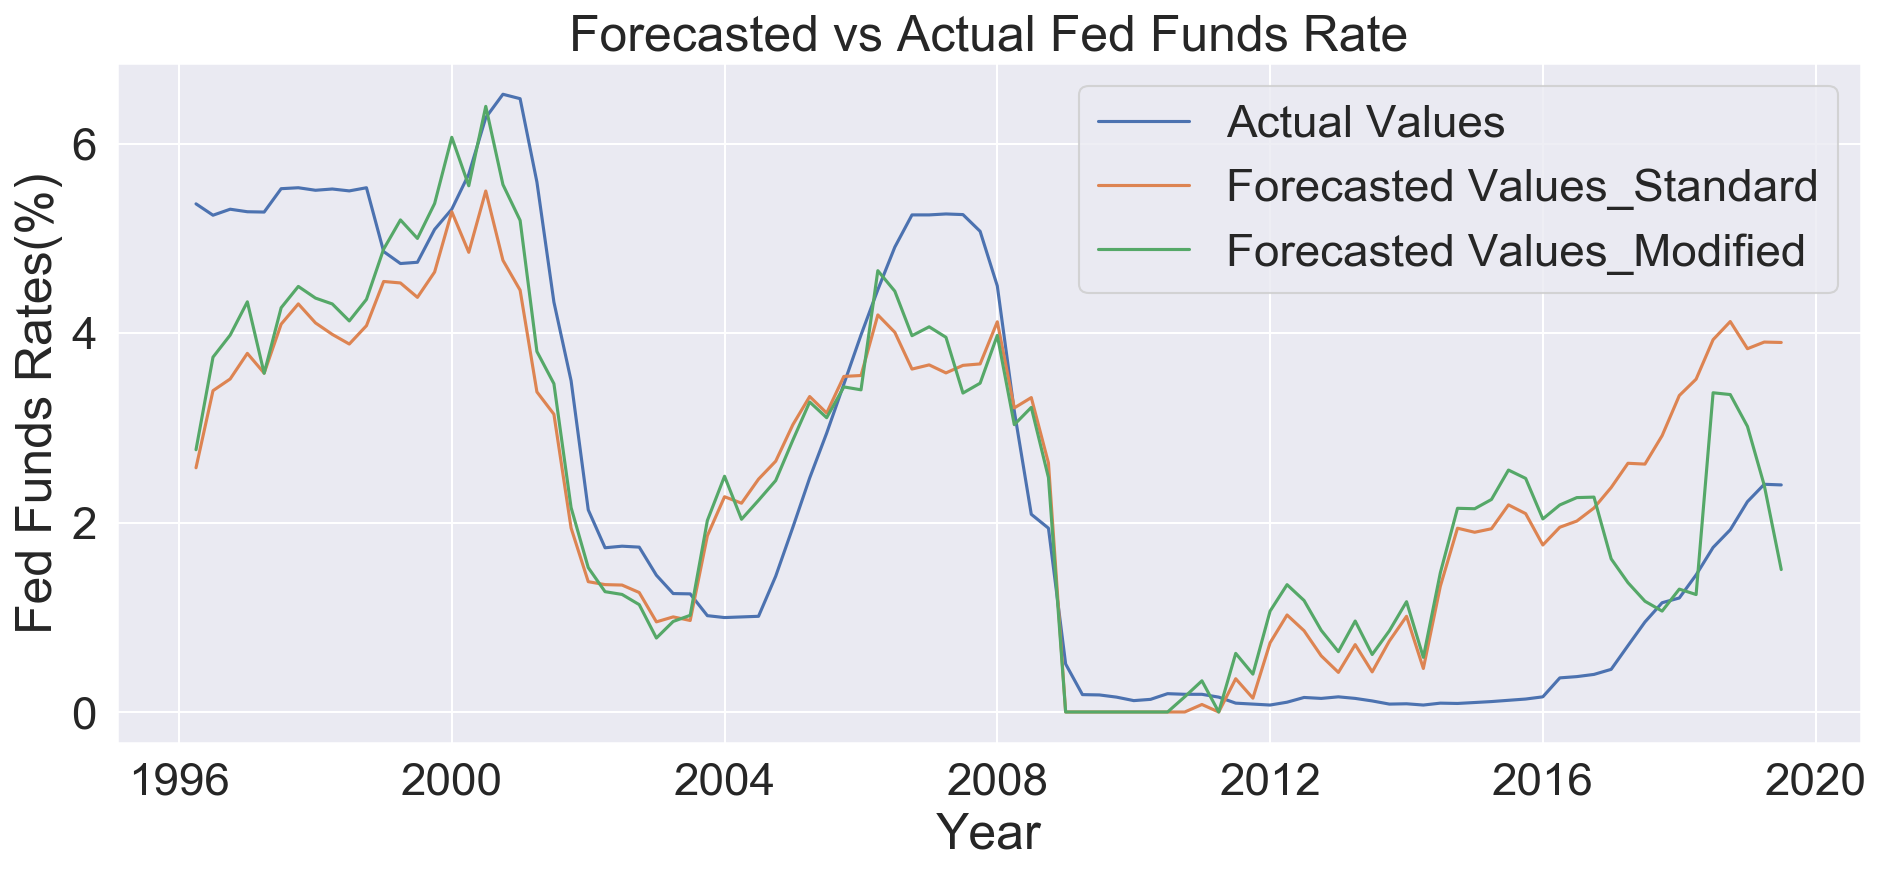

In [22]:
# WTUI_max = 2, change date = 2018-Q2
data4 = regression_data(2,'2018-06-30','2018-03-31')
data4
# run the regression  
results_5 = regression_result(data4)
# plot the forecast vs. actual
plot_forecast(results_5,predict1_fed,data4)

federal funds rate (%)  Inflation rate_yearly change (%)  \
Time                                                                   
1996-03-31                5.363333                          2.000730   
1996-06-30                5.243333                          2.089581   
1996-09-30                5.306667                          2.108890   
1996-12-31                5.280000                          2.352762   
1997-03-31                5.276667                          2.236589   
1997-06-30                5.523333                          1.810431   
1997-09-30                5.533333                          1.646281   
1997-12-31                5.506667                          1.275693   
1998-03-31                5.520000                          0.838199   
1998-06-30                5.500000                          0.767662   
1998-09-30                5.533333                          0.813824   
1998-12-31                4.860000                          0.763247   
1999-03-31                4.733333                          1.019360   
1999-06-30                4.746667                          1.389111   
1999-09-30                5.093333                          1.610526   
1999-12-31                5.306667                          1.942660   
2000-03-31                5.676667                          2.525326   
2000-06-30                6.273333                          2.424895   
2000-09-30                6.520000                          2.515353   
2000-12-31                6.473333                          2.475903   
2001-03-31                5.593333                          2.316264   
2001-06-30                4.326667                          2.336706   
2001-09-30                3.496667                          1.767892   
2001-12-31                2.133333                          1.272690   
2002-03-31                1.733333                          0.778112   
2002-06-30                1.750000                          1.072749   
2002-09-30                1.740000                          1.506726   
2002-12-31                1.443333                          1.912582   
2003-03-31                1.250000                          2.440000   
2003-06-30                1.246667                          1.691238   
...                            ...                               ...   
2012-03-31                0.103333                          2.520316   
2012-06-30                0.153333                          1.762402   
2012-09-30                0.143333                          1.562072   
2012-12-31                0.160000                          1.784341   
2013-03-31                0.143333                          1.450702   
2013-06-30                0.116667                          1.283876   
2013-09-30                0.083333                          1.403130   
2013-12-31                0.086667                          1.248211   
2014-03-31                0.073333                          1.361629   
2014-06-30                0.093333                          1.770288   
2014-09-30                0.090000                          1.633059   
2014-12-31                0.100000                          1.091480   
2015-03-31                0.110000                          0.180740   
2015-06-30                0.123333                          0.196410   
2015-09-30                0.136667                          0.209459   
2015-12-31                0.160000                          0.253418   
2016-03-31                0.360000                          0.736284   
2016-06-30                0.373333                          0.836503   
2016-09-30                0.396667                          0.972527   
2016-12-31                0.450000                          1.509883   
2017-03-31                0.700000                          1.992313   
2017-06-30                0.950000                          1.622558   
2017-09-30                1.153333                  

                              OLS Regression Results                              
Dep. Variable:     federal funds rate (%)   R-squared:                       0.717
Model:                                OLS   Adj. R-squared:                  0.705
Method:                     Least Squares   F-statistic:                     56.44
Date:                    Fri, 22 Nov 2019   Prob (F-statistic):           1.28e-23
Time:                            16:13:04   Log-Likelihood:                -148.05
No. Observations:                      94   AIC:                             306.1
Df Residuals:                          89   BIC:                             318.8
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

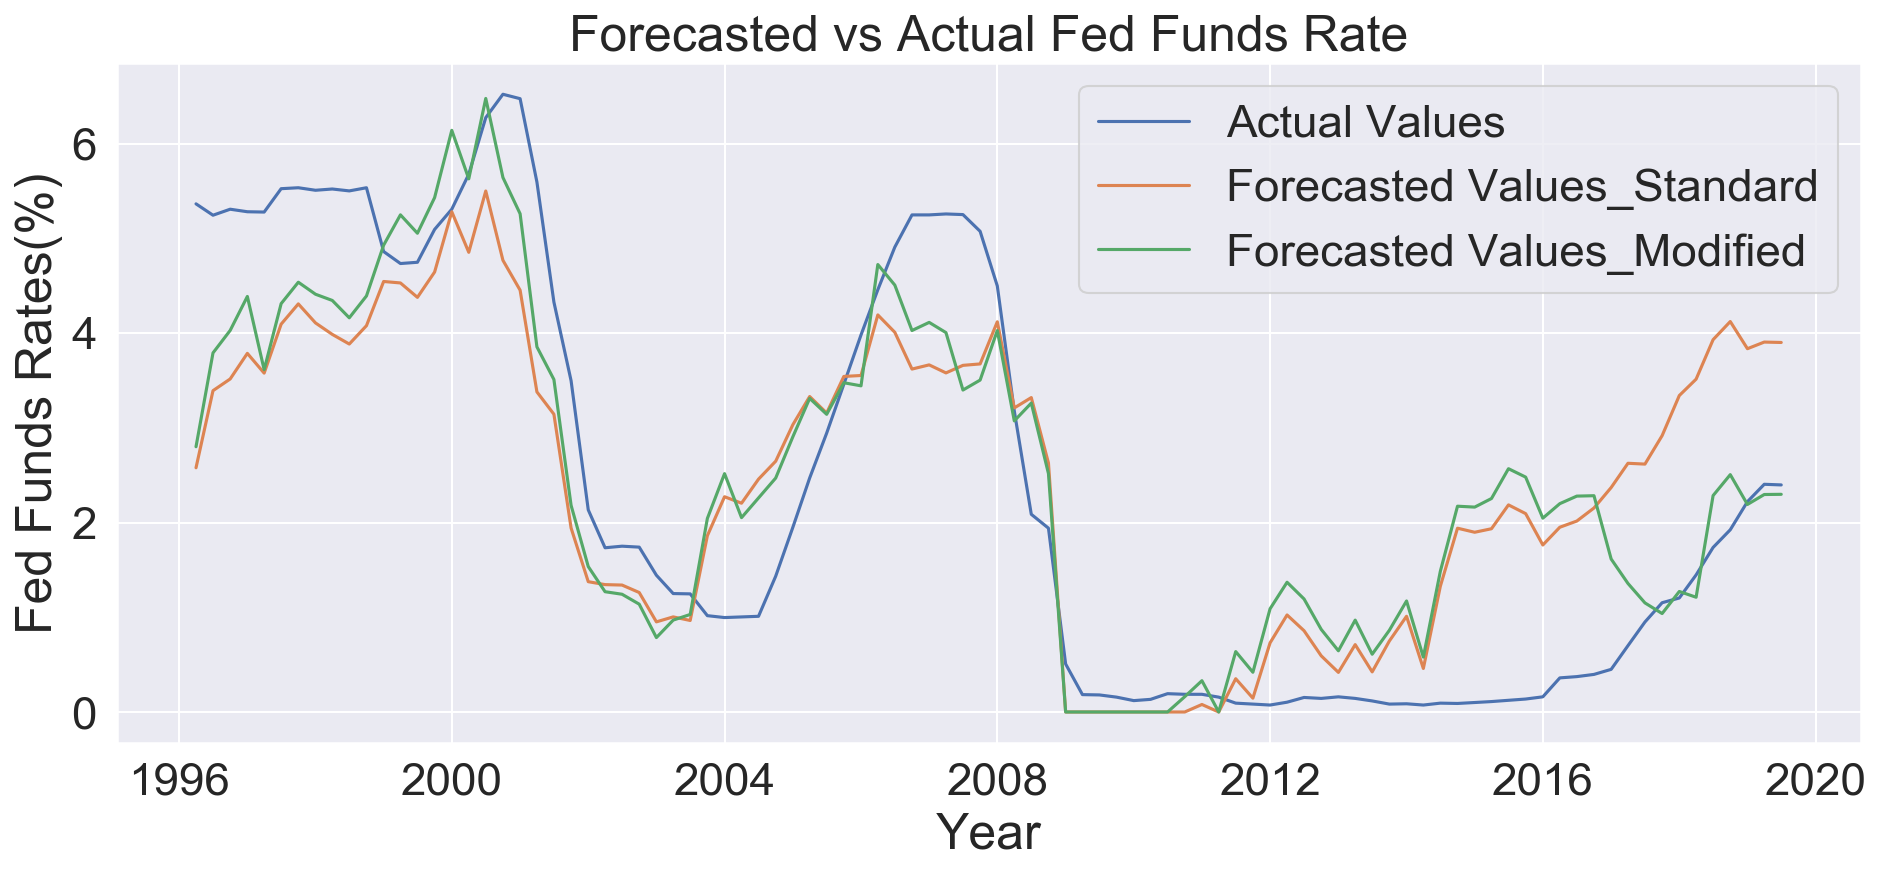

In [23]:
# WTUI_max = 5, change date = 2018-Q2
data4 = regression_data(5,'2018-06-30','2018-03-31')
data4
# run the regression  
results_5 = regression_result(data4)
# plot the forecast vs. actual
plot_forecast(results_5,predict1_fed,data4)

#### 2. get WTUI average using 4 quarter avg

WTUI_avg
year                 
1996-03-31   0.928470
1996-06-30   0.796090
1996-09-30   0.602373
1996-12-31   0.485220
1997-03-31   1.714011
1997-06-30   1.658188
1997-09-30   2.028278
1997-12-31   1.994837
1998-03-31   0.538895
1998-06-30   0.871925
1998-09-30   0.455693
1998-12-31   0.476508
1999-03-31   0.554393
1999-06-30   0.255208
1999-09-30   0.355810
1999-12-31   0.346018
2000-03-31   0.285790
2000-06-30   0.155075
2000-09-30   0.046879
2000-12-31   0.156202
2001-03-31   0.962787
2001-06-30   1.393746
2001-09-30   1.422323
2001-12-31   1.385024
2002-03-31   1.562164
2002-06-30   1.176095
2002-09-30   1.147518
2002-12-31   1.127886
2003-03-31   0.382227
2003-06-30   0.464254
...               ...
2012-06-30   0.473171
2012-09-30   0.560046
2012-12-31   0.520859
2013-03-31   0.359568
2013-06-30   0.434207
2013-09-30   0.802379
2013-12-31   0.814480
2014-03-31   0.821486
2014-06-30   1.020202
2014-09-30   0.712292
2014-12-31   0.619277
2015-03-31   0.545384
2015-06-30   0.233122
2015-09-30   0.474468
2015-12-31   0.785343
2016-03-31   1.032400
2016-06-30   1.309583
2016-09-30   1.657242
2016-12-31   4.907099
2017-03-31   6.778446
2017-06-30   7.329248
2017-09-30   8.789884
2017-12-31   6.500170
2018-03-31   5.639197
2018-06-30   8.067085
2018-09-30  13.576983
2018-12-31  16.687189
2019-03-31  38.989157
2019-06-30  62.679450
2019-09-30  79.872933

[95 rows x 1 columns]

federal funds rate (%)  Inflation rate_yearly change (%)  \
Time                                                                   
1996-03-31                5.363333                          2.000730   
1996-06-30                5.243333                          2.089581   
1996-09-30                5.306667                          2.108890   
1996-12-31                5.280000                          2.352762   
1997-03-31                5.276667                          2.236589   
1997-06-30                5.523333                          1.810431   
1997-09-30                5.533333                          1.646281   
1997-12-31                5.506667                          1.275693   
1998-03-31                5.520000                          0.838199   
1998-06-30                5.500000                          0.767662   
1998-09-30                5.533333                          0.813824   
1998-12-31                4.860000                          0.763247   
1999-03-31                4.733333                          1.019360   
1999-06-30                4.746667                          1.389111   
1999-09-30                5.093333                          1.610526   
1999-12-31                5.306667                          1.942660   
2000-03-31                5.676667                          2.525326   
2000-06-30                6.273333                          2.424895   
2000-09-30                6.520000                          2.515353   
2000-12-31                6.473333                          2.475903   
2001-03-31                5.593333                          2.316264   
2001-06-30                4.326667                          2.336706   
2001-09-30                3.496667                          1.767892   
2001-12-31                2.133333                          1.272690   
2002-03-31                1.733333                          0.778112   
2002-06-30                1.750000                          1.072749   
2002-09-30                1.740000                          1.506726   
2002-12-31                1.443333                          1.912582   
2003-03-31                1.250000                          2.440000   
2003-06-30                1.246667                          1.691238   
...                            ...                               ...   
2012-03-31                0.103333                          2.520316   
2012-06-30                0.153333                          1.762402   
2012-09-30                0.143333                          1.562072   
2012-12-31                0.160000                          1.784341   
2013-03-31                0.143333                          1.450702   
2013-06-30                0.116667                          1.283876   
2013-09-30                0.083333                          1.403130   
2013-12-31                0.086667                          1.248211   
2014-03-31                0.073333                          1.361629   
2014-06-30                0.093333                          1.770288   
2014-09-30                0.090000                          1.633059   
2014-12-31                0.100000                          1.091480   
2015-03-31                0.110000                          0.180740   
2015-06-30                0.123333                          0.196410   
2015-09-30                0.136667                          0.209459   
2015-12-31                0.160000                          0.253418   
2016-03-31                0.360000                          0.736284   
2016-06-30                0.373333                          0.836503   
2016-09-30                0.396667                          0.972527   
2016-12-31                0.450000                          1.509883   
2017-03-31                0.700000                          1.992313   
2017-06-30                0.950000                          1.622558   
2017-09-30                1.153333                  

                              OLS Regression Results                              
Dep. Variable:     federal funds rate (%)   R-squared:                       0.670
Model:                                OLS   Adj. R-squared:                  0.655
Method:                     Least Squares   F-statistic:                     45.11
Date:                    Fri, 22 Nov 2019   Prob (F-statistic):           1.20e-20
Time:                            16:15:18   Log-Likelihood:                -155.35
No. Observations:                      94   AIC:                             320.7
Df Residuals:                          89   BIC:                             333.4
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

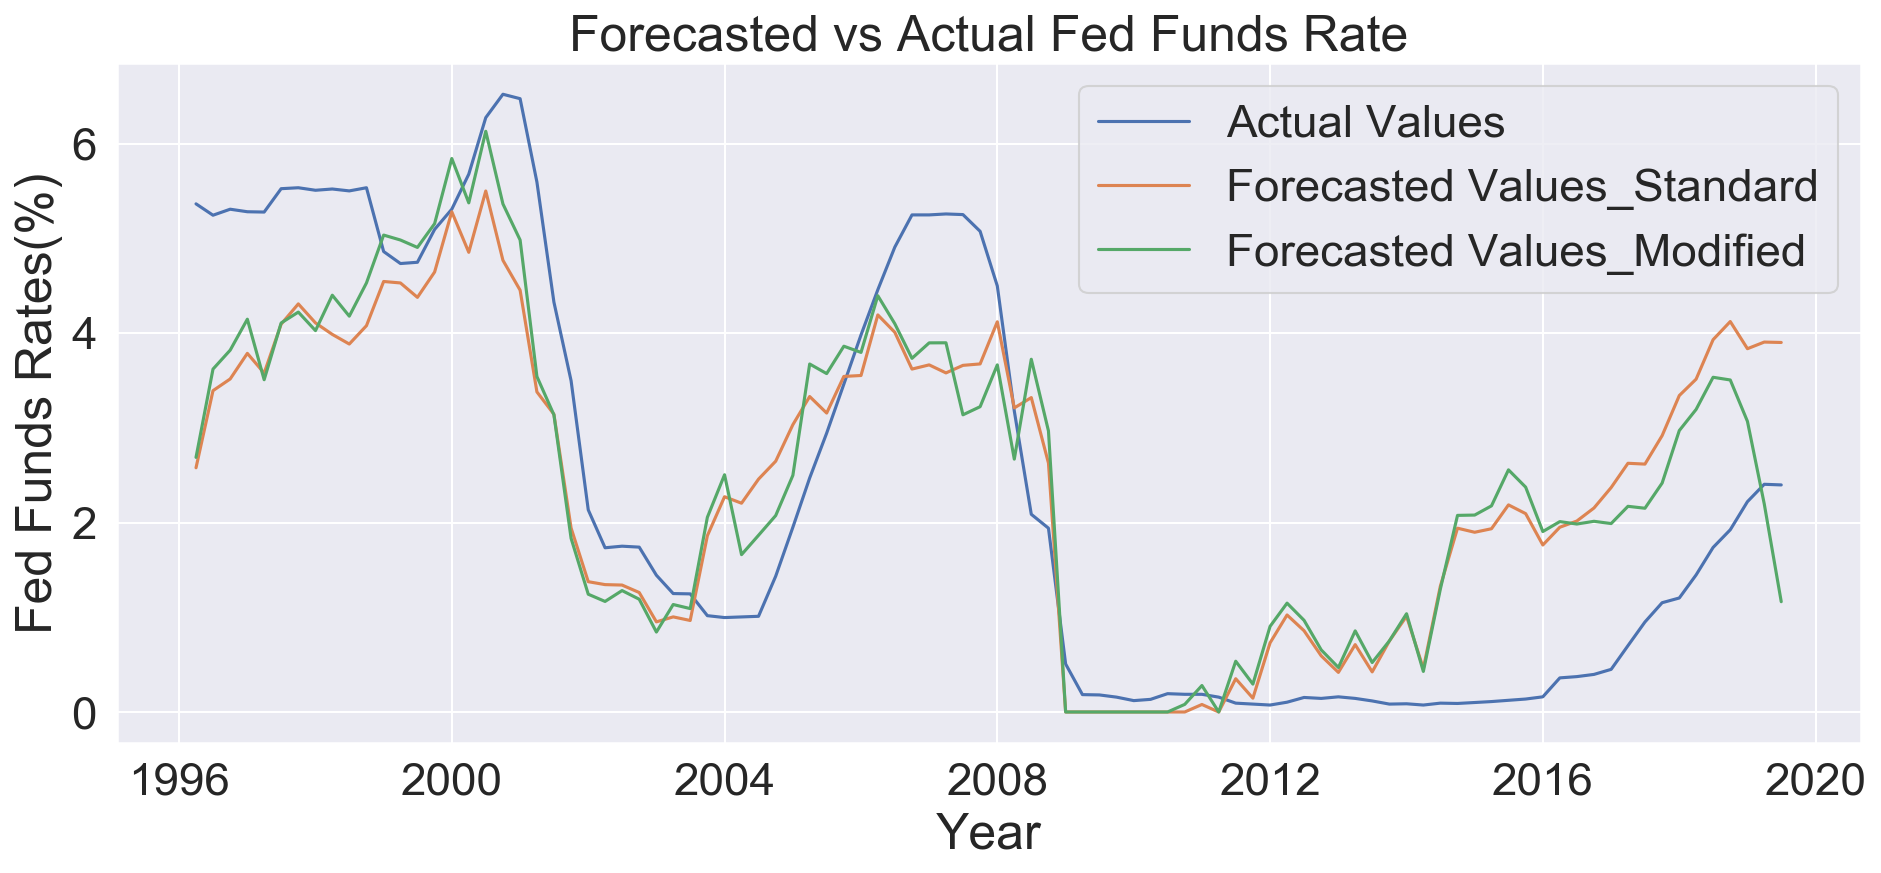

In [24]:
# average WTUI in the past 8 qurters
WTUI_avg = WTUI_average(4,WTUI)
WTUI_avg

# WTUI_max = 2, change date = 2016-Q4
data4 = regression_data(2,'2016-12-31','2016-09-30')
data4
# run the regression  
results_5 = regression_result(data4)
# plot the forecast vs. actual
plot_forecast(results_5,predict1_fed,data4)

federal funds rate (%)  Inflation rate_yearly change (%)  \
Time                                                                   
1996-03-31                5.363333                          2.000730   
1996-06-30                5.243333                          2.089581   
1996-09-30                5.306667                          2.108890   
1996-12-31                5.280000                          2.352762   
1997-03-31                5.276667                          2.236589   
1997-06-30                5.523333                          1.810431   
1997-09-30                5.533333                          1.646281   
1997-12-31                5.506667                          1.275693   
1998-03-31                5.520000                          0.838199   
1998-06-30                5.500000                          0.767662   
1998-09-30                5.533333                          0.813824   
1998-12-31                4.860000                          0.763247   
1999-03-31                4.733333                          1.019360   
1999-06-30                4.746667                          1.389111   
1999-09-30                5.093333                          1.610526   
1999-12-31                5.306667                          1.942660   
2000-03-31                5.676667                          2.525326   
2000-06-30                6.273333                          2.424895   
2000-09-30                6.520000                          2.515353   
2000-12-31                6.473333                          2.475903   
2001-03-31                5.593333                          2.316264   
2001-06-30                4.326667                          2.336706   
2001-09-30                3.496667                          1.767892   
2001-12-31                2.133333                          1.272690   
2002-03-31                1.733333                          0.778112   
2002-06-30                1.750000                          1.072749   
2002-09-30                1.740000                          1.506726   
2002-12-31                1.443333                          1.912582   
2003-03-31                1.250000                          2.440000   
2003-06-30                1.246667                          1.691238   
...                            ...                               ...   
2012-03-31                0.103333                          2.520316   
2012-06-30                0.153333                          1.762402   
2012-09-30                0.143333                          1.562072   
2012-12-31                0.160000                          1.784341   
2013-03-31                0.143333                          1.450702   
2013-06-30                0.116667                          1.283876   
2013-09-30                0.083333                          1.403130   
2013-12-31                0.086667                          1.248211   
2014-03-31                0.073333                          1.361629   
2014-06-30                0.093333                          1.770288   
2014-09-30                0.090000                          1.633059   
2014-12-31                0.100000                          1.091480   
2015-03-31                0.110000                          0.180740   
2015-06-30                0.123333                          0.196410   
2015-09-30                0.136667                          0.209459   
2015-12-31                0.160000                          0.253418   
2016-03-31                0.360000                          0.736284   
2016-06-30                0.373333                          0.836503   
2016-09-30                0.396667                          0.972527   
2016-12-31                0.450000                          1.509883   
2017-03-31                0.700000                          1.992313   
2017-06-30                0.950000                          1.622558   
2017-09-30                1.153333                  

                              OLS Regression Results                              
Dep. Variable:     federal funds rate (%)   R-squared:                       0.710
Model:                                OLS   Adj. R-squared:                  0.697
Method:                     Least Squares   F-statistic:                     54.51
Date:                    Fri, 22 Nov 2019   Prob (F-statistic):           3.81e-23
Time:                            16:15:19   Log-Likelihood:                -149.21
No. Observations:                      94   AIC:                             308.4
Df Residuals:                          89   BIC:                             321.1
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

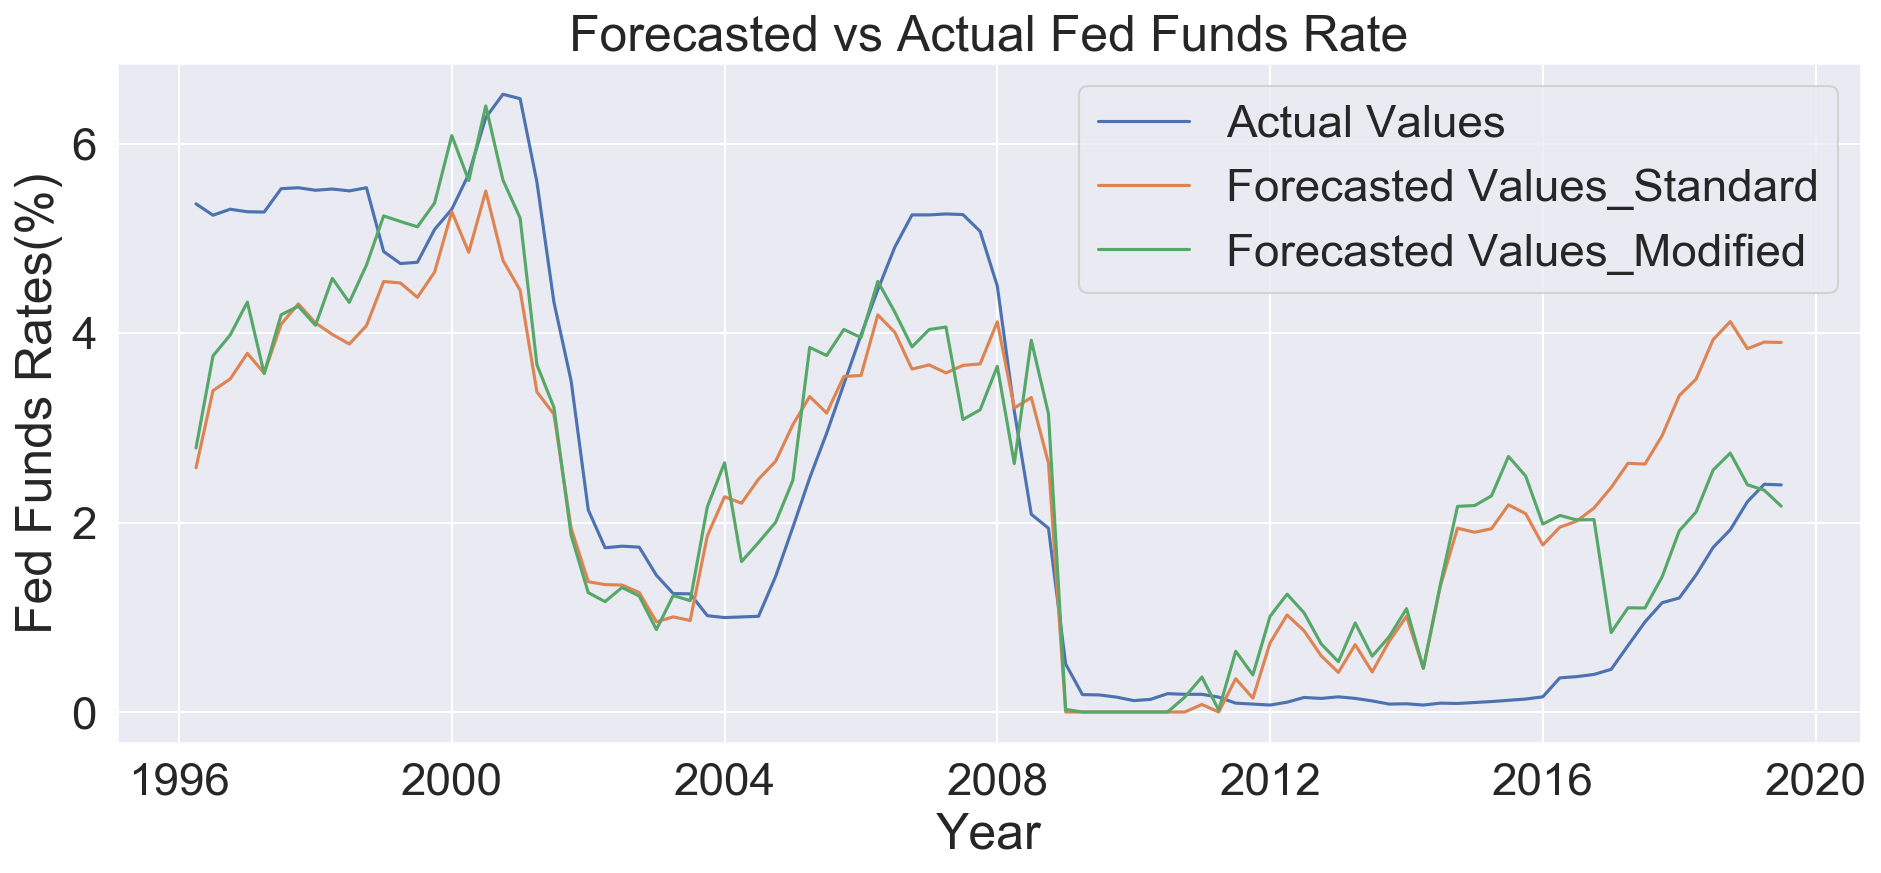

In [25]:
# WTUI_max = 5, change date = 2016-Q4
data4 = regression_data(5,'2016-12-31','2016-09-30')
data4
# run the regression  
results_5 = regression_result(data4)
# plot the forecast vs. actual
plot_forecast(results_5,predict1_fed,data4)

federal funds rate (%)  Inflation rate_yearly change (%)  \
Time                                                                   
1996-03-31                5.363333                          2.000730   
1996-06-30                5.243333                          2.089581   
1996-09-30                5.306667                          2.108890   
1996-12-31                5.280000                          2.352762   
1997-03-31                5.276667                          2.236589   
1997-06-30                5.523333                          1.810431   
1997-09-30                5.533333                          1.646281   
1997-12-31                5.506667                          1.275693   
1998-03-31                5.520000                          0.838199   
1998-06-30                5.500000                          0.767662   
1998-09-30                5.533333                          0.813824   
1998-12-31                4.860000                          0.763247   
1999-03-31                4.733333                          1.019360   
1999-06-30                4.746667                          1.389111   
1999-09-30                5.093333                          1.610526   
1999-12-31                5.306667                          1.942660   
2000-03-31                5.676667                          2.525326   
2000-06-30                6.273333                          2.424895   
2000-09-30                6.520000                          2.515353   
2000-12-31                6.473333                          2.475903   
2001-03-31                5.593333                          2.316264   
2001-06-30                4.326667                          2.336706   
2001-09-30                3.496667                          1.767892   
2001-12-31                2.133333                          1.272690   
2002-03-31                1.733333                          0.778112   
2002-06-30                1.750000                          1.072749   
2002-09-30                1.740000                          1.506726   
2002-12-31                1.443333                          1.912582   
2003-03-31                1.250000                          2.440000   
2003-06-30                1.246667                          1.691238   
...                            ...                               ...   
2012-03-31                0.103333                          2.520316   
2012-06-30                0.153333                          1.762402   
2012-09-30                0.143333                          1.562072   
2012-12-31                0.160000                          1.784341   
2013-03-31                0.143333                          1.450702   
2013-06-30                0.116667                          1.283876   
2013-09-30                0.083333                          1.403130   
2013-12-31                0.086667                          1.248211   
2014-03-31                0.073333                          1.361629   
2014-06-30                0.093333                          1.770288   
2014-09-30                0.090000                          1.633059   
2014-12-31                0.100000                          1.091480   
2015-03-31                0.110000                          0.180740   
2015-06-30                0.123333                          0.196410   
2015-09-30                0.136667                          0.209459   
2015-12-31                0.160000                          0.253418   
2016-03-31                0.360000                          0.736284   
2016-06-30                0.373333                          0.836503   
2016-09-30                0.396667                          0.972527   
2016-12-31                0.450000                          1.509883   
2017-03-31                0.700000                          1.992313   
2017-06-30                0.950000                          1.622558   
2017-09-30                1.153333                  

                              OLS Regression Results                              
Dep. Variable:     federal funds rate (%)   R-squared:                       0.698
Model:                                OLS   Adj. R-squared:                  0.685
Method:                     Least Squares   F-statistic:                     51.49
Date:                    Fri, 22 Nov 2019   Prob (F-statistic):           2.24e-22
Time:                            16:15:21   Log-Likelihood:                -151.11
No. Observations:                      94   AIC:                             312.2
Df Residuals:                          89   BIC:                             324.9
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

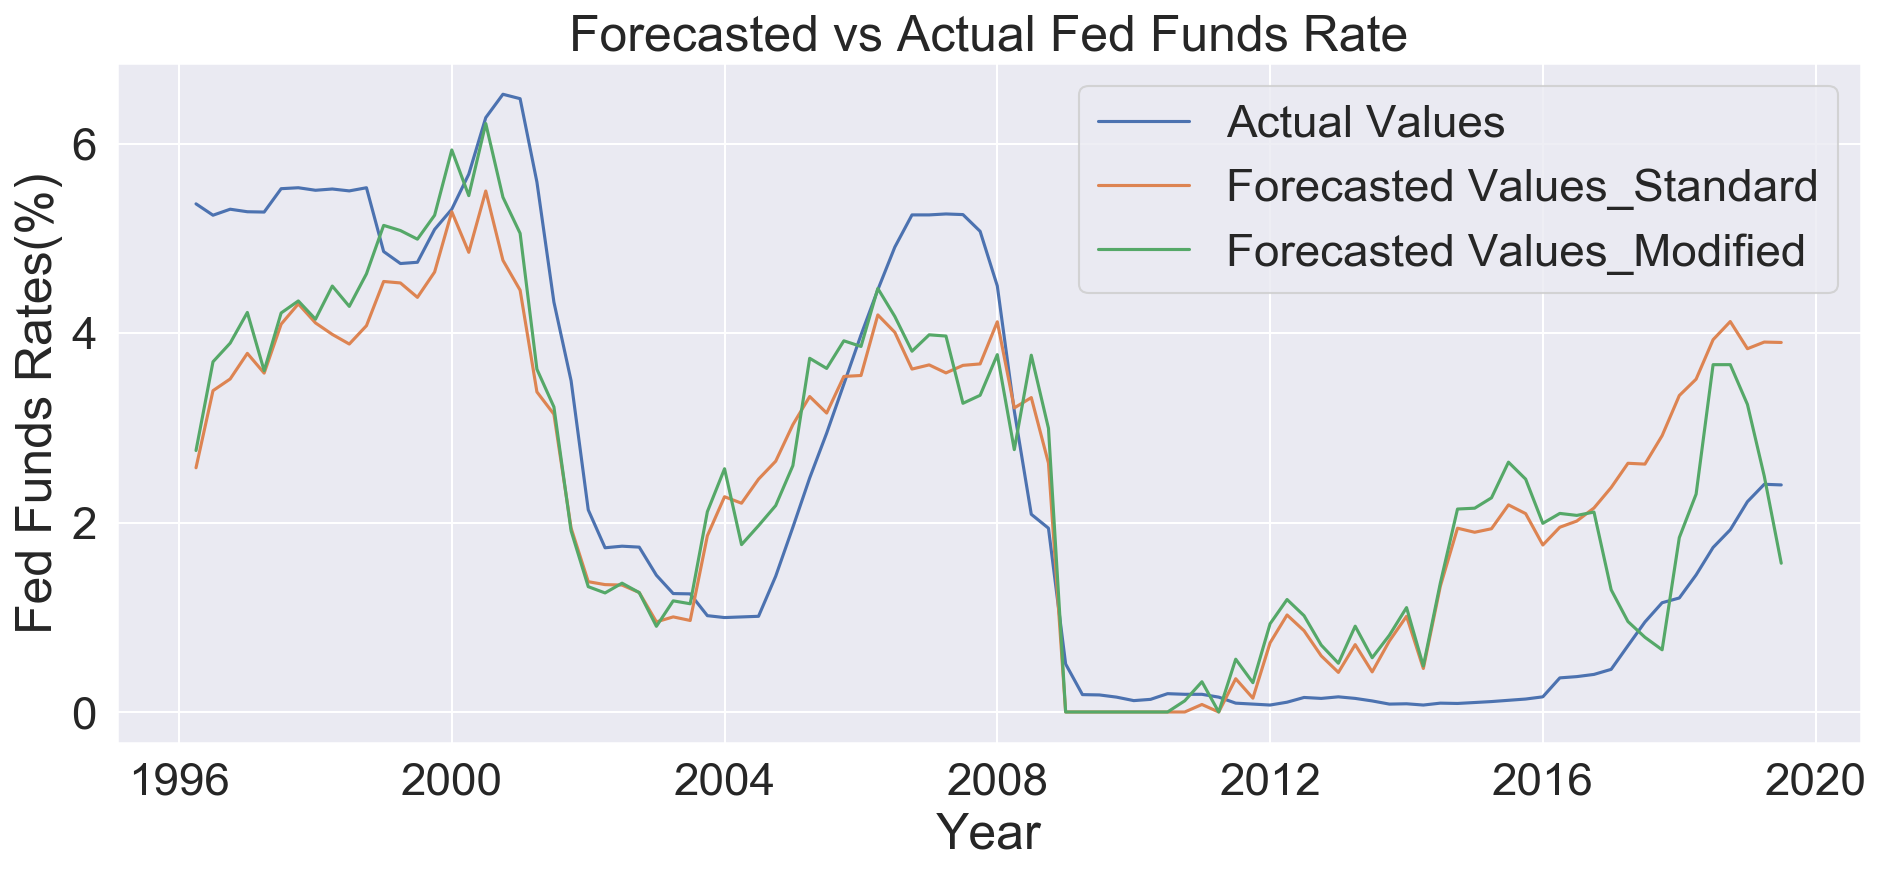

In [26]:
# WTUI_max = 2, change date = 2018-Q2
data4 = regression_data(2,'2018-06-30','2018-03-31')
data4
# run the regression  
results_5 = regression_result(data4)
# plot the forecast vs. actual
plot_forecast(results_5,predict1_fed,data4)

federal funds rate (%)  Inflation rate_yearly change (%)  \
Time                                                                   
1996-03-31                5.363333                          2.000730   
1996-06-30                5.243333                          2.089581   
1996-09-30                5.306667                          2.108890   
1996-12-31                5.280000                          2.352762   
1997-03-31                5.276667                          2.236589   
1997-06-30                5.523333                          1.810431   
1997-09-30                5.533333                          1.646281   
1997-12-31                5.506667                          1.275693   
1998-03-31                5.520000                          0.838199   
1998-06-30                5.500000                          0.767662   
1998-09-30                5.533333                          0.813824   
1998-12-31                4.860000                          0.763247   
1999-03-31                4.733333                          1.019360   
1999-06-30                4.746667                          1.389111   
1999-09-30                5.093333                          1.610526   
1999-12-31                5.306667                          1.942660   
2000-03-31                5.676667                          2.525326   
2000-06-30                6.273333                          2.424895   
2000-09-30                6.520000                          2.515353   
2000-12-31                6.473333                          2.475903   
2001-03-31                5.593333                          2.316264   
2001-06-30                4.326667                          2.336706   
2001-09-30                3.496667                          1.767892   
2001-12-31                2.133333                          1.272690   
2002-03-31                1.733333                          0.778112   
2002-06-30                1.750000                          1.072749   
2002-09-30                1.740000                          1.506726   
2002-12-31                1.443333                          1.912582   
2003-03-31                1.250000                          2.440000   
2003-06-30                1.246667                          1.691238   
...                            ...                               ...   
2012-03-31                0.103333                          2.520316   
2012-06-30                0.153333                          1.762402   
2012-09-30                0.143333                          1.562072   
2012-12-31                0.160000                          1.784341   
2013-03-31                0.143333                          1.450702   
2013-06-30                0.116667                          1.283876   
2013-09-30                0.083333                          1.403130   
2013-12-31                0.086667                          1.248211   
2014-03-31                0.073333                          1.361629   
2014-06-30                0.093333                          1.770288   
2014-09-30                0.090000                          1.633059   
2014-12-31                0.100000                          1.091480   
2015-03-31                0.110000                          0.180740   
2015-06-30                0.123333                          0.196410   
2015-09-30                0.136667                          0.209459   
2015-12-31                0.160000                          0.253418   
2016-03-31                0.360000                          0.736284   
2016-06-30                0.373333                          0.836503   
2016-09-30                0.396667                          0.972527   
2016-12-31                0.450000                          1.509883   
2017-03-31                0.700000                          1.992313   
2017-06-30                0.950000                          1.622558   
2017-09-30                1.153333                  

                              OLS Regression Results                              
Dep. Variable:     federal funds rate (%)   R-squared:                       0.711
Model:                                OLS   Adj. R-squared:                  0.698
Method:                     Least Squares   F-statistic:                     54.77
Date:                    Fri, 22 Nov 2019   Prob (F-statistic):           3.29e-23
Time:                            16:15:23   Log-Likelihood:                -149.06
No. Observations:                      94   AIC:                             308.1
Df Residuals:                          89   BIC:                             320.8
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

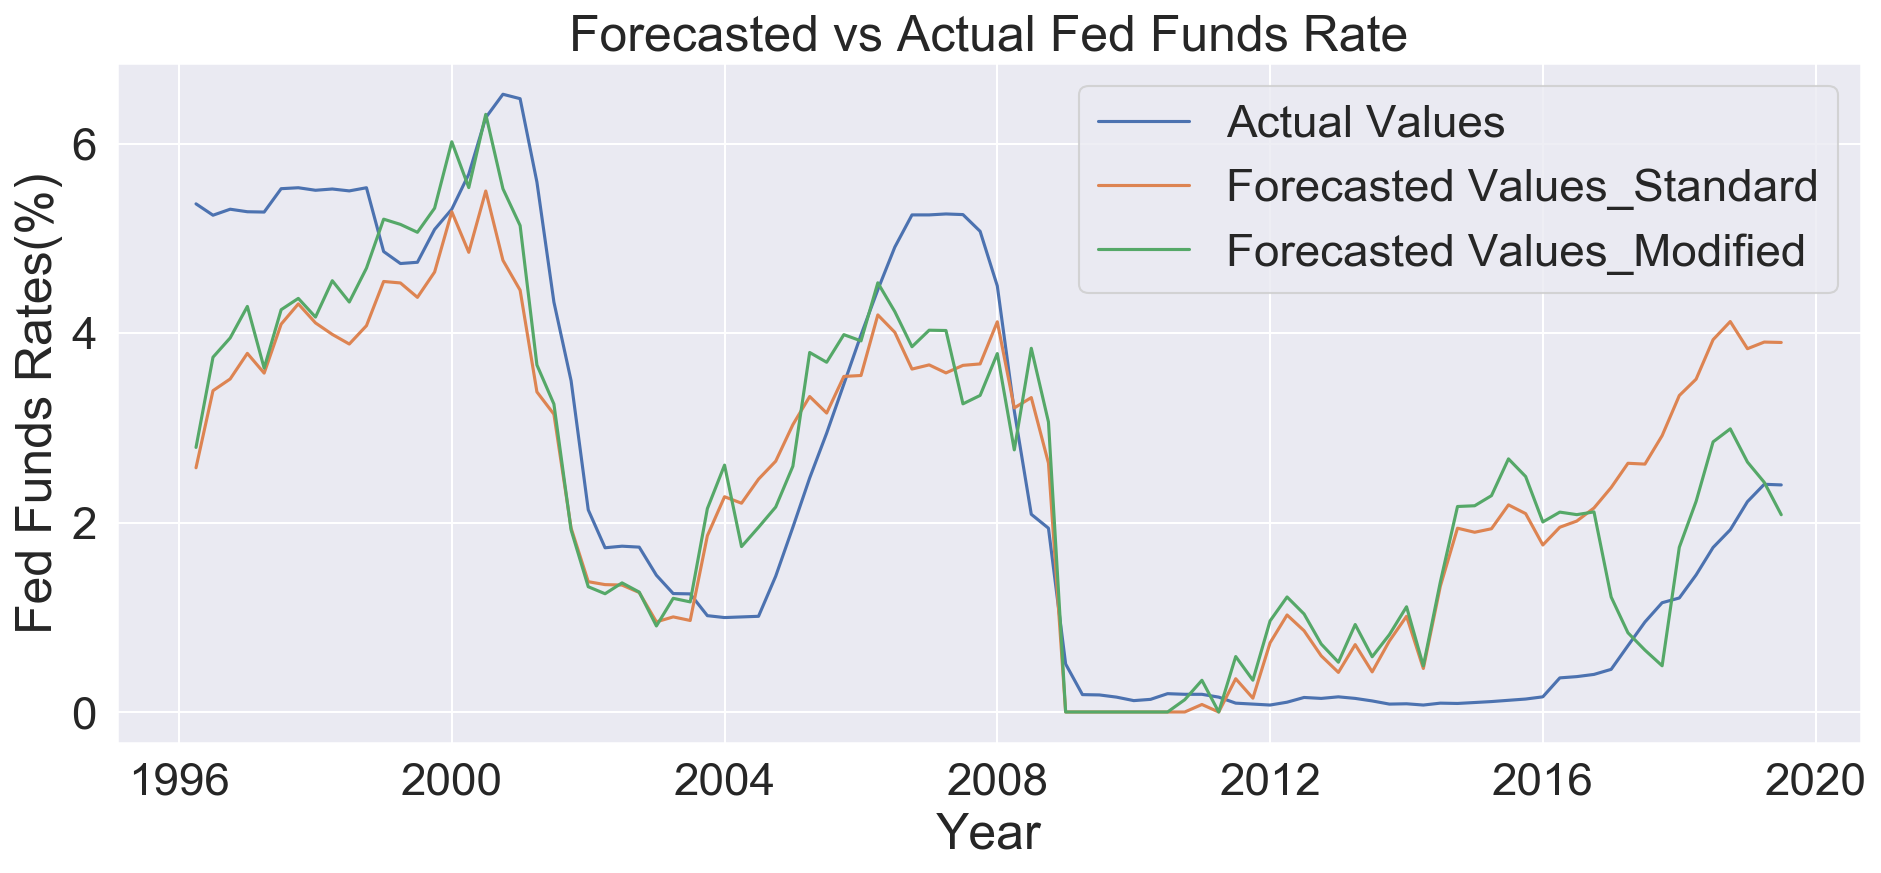

In [27]:
# WTUI_max = 5, change date = 2018-Q2
data4 = regression_data(5,'2018-06-30','2018-03-31')
data4
# run the regression  
results_5 = regression_result(data4)
# plot the forecast vs. actual
plot_forecast(results_5,predict1_fed,data4)

#### 3. use 4 quarter avg for WTUI and omit the WTUI_max term

In [30]:
# generate WTUI_avg with changing point
def regression_omit(change_date1,change_date2):

    WTUI_1 = WTUI_avg.copy()
    WTUI_1.loc[change_date1:,:] = 0
    WTUI_1 = WTUI_1.rename(columns={'WTUI_avg':'WTUI_avg (t<k)'})

    WTUI_2 = WTUI_avg.copy()
    WTUI_2.loc[:change_date2,:] = 0
    WTUI_2 = WTUI_2.rename(columns={'WTUI_avg':'WTUI_avg (t>=k)'})

    data = pd.concat([data3,WTUI_1,WTUI_2],join='inner',axis=1)
    return data

WTUI_avg
year                 
1996-03-31   0.928470
1996-06-30   0.796090
1996-09-30   0.602373
1996-12-31   0.485220
1997-03-31   1.714011
1997-06-30   1.658188
1997-09-30   2.028278
1997-12-31   1.994837
1998-03-31   0.538895
1998-06-30   0.871925
1998-09-30   0.455693
1998-12-31   0.476508
1999-03-31   0.554393
1999-06-30   0.255208
1999-09-30   0.355810
1999-12-31   0.346018
2000-03-31   0.285790
2000-06-30   0.155075
2000-09-30   0.046879
2000-12-31   0.156202
2001-03-31   0.962787
2001-06-30   1.393746
2001-09-30   1.422323
2001-12-31   1.385024
2002-03-31   1.562164
2002-06-30   1.176095
2002-09-30   1.147518
2002-12-31   1.127886
2003-03-31   0.382227
2003-06-30   0.464254
...               ...
2012-06-30   0.473171
2012-09-30   0.560046
2012-12-31   0.520859
2013-03-31   0.359568
2013-06-30   0.434207
2013-09-30   0.802379
2013-12-31   0.814480
2014-03-31   0.821486
2014-06-30   1.020202
2014-09-30   0.712292
2014-12-31   0.619277
2015-03-31   0.545384
2015-06-30   0.233122
2015-09-30   0.474468
2015-12-31   0.785343
2016-03-31   1.032400
2016-06-30   1.309583
2016-09-30   1.657242
2016-12-31   4.907099
2017-03-31   6.778446
2017-06-30   7.329248
2017-09-30   8.789884
2017-12-31   6.500170
2018-03-31   5.639197
2018-06-30   8.067085
2018-09-30  13.576983
2018-12-31  16.687189
2019-03-31  38.989157
2019-06-30  62.679450
2019-09-30  79.872933

[95 rows x 1 columns]

federal funds rate (%)  Inflation rate_yearly change (%)  \
Time                                                                   
1996-03-31                5.363333                          2.000730   
1996-06-30                5.243333                          2.089581   
1996-09-30                5.306667                          2.108890   
1996-12-31                5.280000                          2.352762   
1997-03-31                5.276667                          2.236589   
1997-06-30                5.523333                          1.810431   
1997-09-30                5.533333                          1.646281   
1997-12-31                5.506667                          1.275693   
1998-03-31                5.520000                          0.838199   
1998-06-30                5.500000                          0.767662   
1998-09-30                5.533333                          0.813824   
1998-12-31                4.860000                          0.763247   
1999-03-31                4.733333                          1.019360   
1999-06-30                4.746667                          1.389111   
1999-09-30                5.093333                          1.610526   
1999-12-31                5.306667                          1.942660   
2000-03-31                5.676667                          2.525326   
2000-06-30                6.273333                          2.424895   
2000-09-30                6.520000                          2.515353   
2000-12-31                6.473333                          2.475903   
2001-03-31                5.593333                          2.316264   
2001-06-30                4.326667                          2.336706   
2001-09-30                3.496667                          1.767892   
2001-12-31                2.133333                          1.272690   
2002-03-31                1.733333                          0.778112   
2002-06-30                1.750000                          1.072749   
2002-09-30                1.740000                          1.506726   
2002-12-31                1.443333                          1.912582   
2003-03-31                1.250000                          2.440000   
2003-06-30                1.246667                          1.691238   
...                            ...                               ...   
2012-03-31                0.103333                          2.520316   
2012-06-30                0.153333                          1.762402   
2012-09-30                0.143333                          1.562072   
2012-12-31                0.160000                          1.784341   
2013-03-31                0.143333                          1.450702   
2013-06-30                0.116667                          1.283876   
2013-09-30                0.083333                          1.403130   
2013-12-31                0.086667                          1.248211   
2014-03-31                0.073333                          1.361629   
2014-06-30                0.093333                          1.770288   
2014-09-30                0.090000                          1.633059   
2014-12-31                0.100000                          1.091480   
2015-03-31                0.110000                          0.180740   
2015-06-30                0.123333                          0.196410   
2015-09-30                0.136667                          0.209459   
2015-12-31                0.160000                          0.253418   
2016-03-31                0.360000                          0.736284   
2016-06-30                0.373333                          0.836503   
2016-09-30                0.396667                          0.972527   
2016-12-31                0.450000                          1.509883   
2017-03-31                0.700000                          1.992313   
2017-06-30                0.950000                          1.622558   
2017-09-30                1.153333                  

                              OLS Regression Results                              
Dep. Variable:     federal funds rate (%)   R-squared:                       0.664
Model:                                OLS   Adj. R-squared:                  0.649
Method:                     Least Squares   F-statistic:                     43.91
Date:                    Fri, 22 Nov 2019   Prob (F-statistic):           2.66e-20
Time:                            16:47:48   Log-Likelihood:                -156.20
No. Observations:                      94   AIC:                             322.4
Df Residuals:                          89   BIC:                             335.1
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

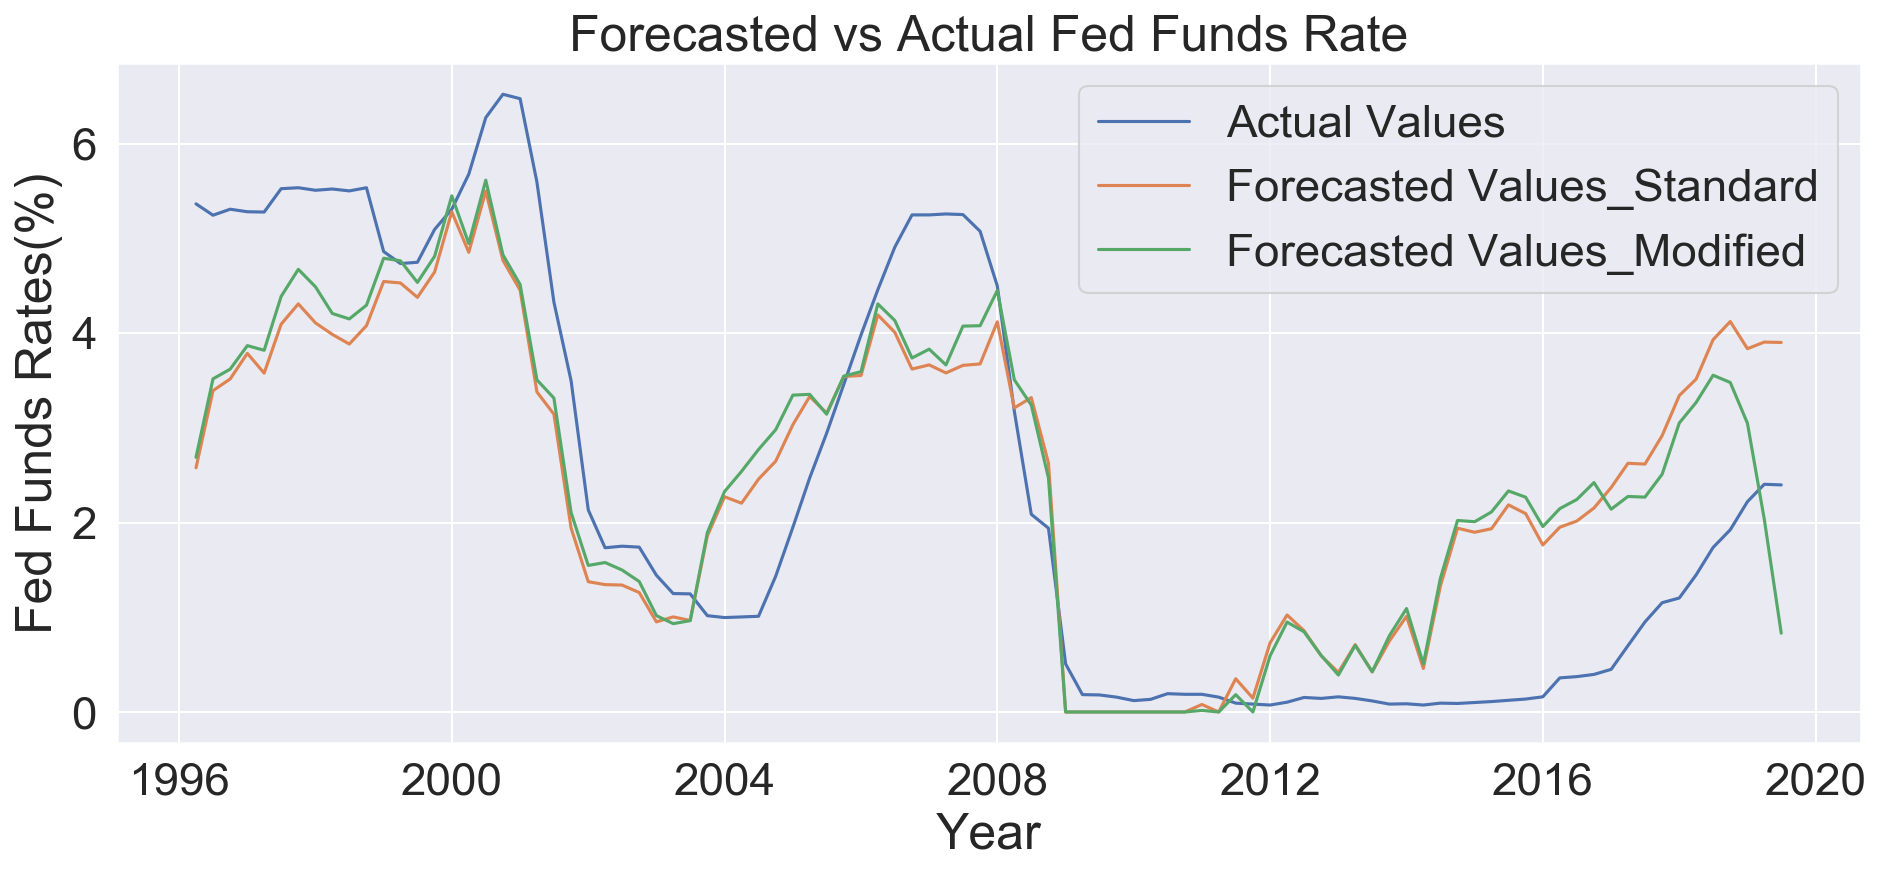

In [67]:
# average WTUI in the past 8 qurters
WTUI_avg = WTUI_average(4,WTUI)
WTUI_avg

data4 = regression_omit('2016-12-31','2016-09-30')
data4
# run the regression  
results_5 = regression_result(data4)
# plot the forecast vs. actual
plot_forecast(results_5,predict1_fed,data4)

federal funds rate (%)  Inflation rate_yearly change (%)  \
Time                                                                   
1996-03-31                5.363333                          2.000730   
1996-06-30                5.243333                          2.089581   
1996-09-30                5.306667                          2.108890   
1996-12-31                5.280000                          2.352762   
1997-03-31                5.276667                          2.236589   
1997-06-30                5.523333                          1.810431   
1997-09-30                5.533333                          1.646281   
1997-12-31                5.506667                          1.275693   
1998-03-31                5.520000                          0.838199   
1998-06-30                5.500000                          0.767662   
1998-09-30                5.533333                          0.813824   
1998-12-31                4.860000                          0.763247   
1999-03-31                4.733333                          1.019360   
1999-06-30                4.746667                          1.389111   
1999-09-30                5.093333                          1.610526   
1999-12-31                5.306667                          1.942660   
2000-03-31                5.676667                          2.525326   
2000-06-30                6.273333                          2.424895   
2000-09-30                6.520000                          2.515353   
2000-12-31                6.473333                          2.475903   
2001-03-31                5.593333                          2.316264   
2001-06-30                4.326667                          2.336706   
2001-09-30                3.496667                          1.767892   
2001-12-31                2.133333                          1.272690   
2002-03-31                1.733333                          0.778112   
2002-06-30                1.750000                          1.072749   
2002-09-30                1.740000                          1.506726   
2002-12-31                1.443333                          1.912582   
2003-03-31                1.250000                          2.440000   
2003-06-30                1.246667                          1.691238   
...                            ...                               ...   
2012-03-31                0.103333                          2.520316   
2012-06-30                0.153333                          1.762402   
2012-09-30                0.143333                          1.562072   
2012-12-31                0.160000                          1.784341   
2013-03-31                0.143333                          1.450702   
2013-06-30                0.116667                          1.283876   
2013-09-30                0.083333                          1.403130   
2013-12-31                0.086667                          1.248211   
2014-03-31                0.073333                          1.361629   
2014-06-30                0.093333                          1.770288   
2014-09-30                0.090000                          1.633059   
2014-12-31                0.100000                          1.091480   
2015-03-31                0.110000                          0.180740   
2015-06-30                0.123333                          0.196410   
2015-09-30                0.136667                          0.209459   
2015-12-31                0.160000                          0.253418   
2016-03-31                0.360000                          0.736284   
2016-06-30                0.373333                          0.836503   
2016-09-30                0.396667                          0.972527   
2016-12-31                0.450000                          1.509883   
2017-03-31                0.700000                          1.992313   
2017-06-30                0.950000                          1.622558   
2017-09-30                1.153333                  

                              OLS Regression Results                              
Dep. Variable:     federal funds rate (%)   R-squared:                       0.689
Model:                                OLS   Adj. R-squared:                  0.675
Method:                     Least Squares   F-statistic:                     49.20
Date:                    Fri, 22 Nov 2019   Prob (F-statistic):           8.98e-22
Time:                            16:47:55   Log-Likelihood:                -152.58
No. Observations:                      94   AIC:                             315.2
Df Residuals:                          89   BIC:                             327.9
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

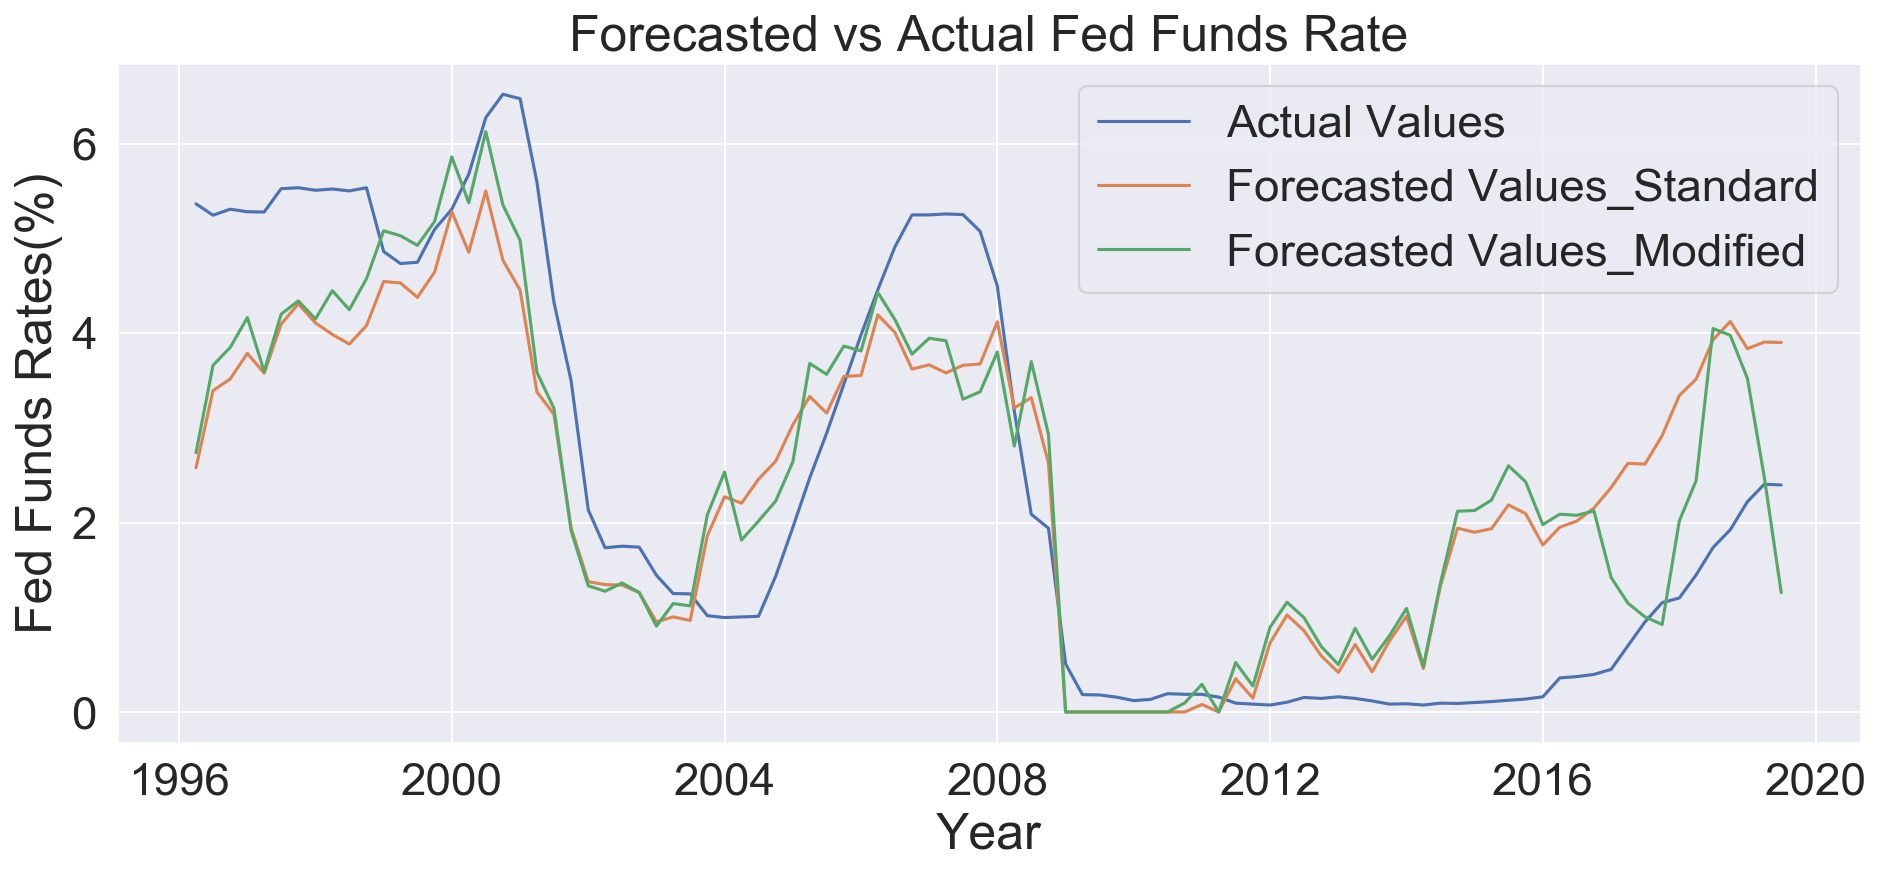

In [68]:
# WTUI_max = 2, change date = 2018-Q2
data4 = regression_omit('2018-06-30','2018-03-31')
data4
# run the regression  
results_5 = regression_result(data4)
# plot the forecast vs. actual
plot_forecast(results_5,predict1_fed,data4)

#### 4. instead of WTUI average, use actual WTUI each quarter 

In [62]:
# generate WTUI_avg with changing point
def regression_actual(WTUI_max,change_date1,change_date2):

    WTUI_diff = pd.DataFrame(np.array(WTUI)-WTUI_max,columns = {'WTUI-WTUI_max'})
    WTUI_diff.index = WTUI.index
    WTUI_1 = WTUI_diff.copy()
    WTUI_1.loc[change_date1:,:] = 0
    WTUI_1 = WTUI_1.rename(columns={'WTUI-WTUI_max':'WTUI-WTUI_max (t<k)'})

    WTUI_2 = WTUI_diff.copy()
    WTUI_2.loc[:change_date2,:] = 0
    WTUI_2 = WTUI_2.rename(columns={'WTUI-WTUI_max':'WTUI-WTUI_max (t>=k)'})

    data = pd.concat([data3,WTUI_1,WTUI_2],join='inner',axis=1)
    return data

federal funds rate (%)  Inflation rate_yearly change (%)  \
Time                                                                   
1996-03-31                5.363333                          2.000730   
1996-06-30                5.243333                          2.089581   
1996-09-30                5.306667                          2.108890   
1996-12-31                5.280000                          2.352762   
1997-03-31                5.276667                          2.236589   
1997-06-30                5.523333                          1.810431   
1997-09-30                5.533333                          1.646281   
1997-12-31                5.506667                          1.275693   
1998-03-31                5.520000                          0.838199   
1998-06-30                5.500000                          0.767662   
1998-09-30                5.533333                          0.813824   
1998-12-31                4.860000                          0.763247   
1999-03-31                4.733333                          1.019360   
1999-06-30                4.746667                          1.389111   
1999-09-30                5.093333                          1.610526   
1999-12-31                5.306667                          1.942660   
2000-03-31                5.676667                          2.525326   
2000-06-30                6.273333                          2.424895   
2000-09-30                6.520000                          2.515353   
2000-12-31                6.473333                          2.475903   
2001-03-31                5.593333                          2.316264   
2001-06-30                4.326667                          2.336706   
2001-09-30                3.496667                          1.767892   
2001-12-31                2.133333                          1.272690   
2002-03-31                1.733333                          0.778112   
2002-06-30                1.750000                          1.072749   
2002-09-30                1.740000                          1.506726   
2002-12-31                1.443333                          1.912582   
2003-03-31                1.250000                          2.440000   
2003-06-30                1.246667                          1.691238   
...                            ...                               ...   
2012-03-31                0.103333                          2.520316   
2012-06-30                0.153333                          1.762402   
2012-09-30                0.143333                          1.562072   
2012-12-31                0.160000                          1.784341   
2013-03-31                0.143333                          1.450702   
2013-06-30                0.116667                          1.283876   
2013-09-30                0.083333                          1.403130   
2013-12-31                0.086667                          1.248211   
2014-03-31                0.073333                          1.361629   
2014-06-30                0.093333                          1.770288   
2014-09-30                0.090000                          1.633059   
2014-12-31                0.100000                          1.091480   
2015-03-31                0.110000                          0.180740   
2015-06-30                0.123333                          0.196410   
2015-09-30                0.136667                          0.209459   
2015-12-31                0.160000                          0.253418   
2016-03-31                0.360000                          0.736284   
2016-06-30                0.373333                          0.836503   
2016-09-30                0.396667                          0.972527   
2016-12-31                0.450000                          1.509883   
2017-03-31                0.700000                          1.992313   
2017-06-30                0.950000                          1.622558   
2017-09-30                1.153333                  

                              OLS Regression Results                              
Dep. Variable:     federal funds rate (%)   R-squared:                       0.653
Model:                                OLS   Adj. R-squared:                  0.637
Method:                     Least Squares   F-statistic:                     41.79
Date:                    Fri, 22 Nov 2019   Prob (F-statistic):           1.12e-19
Time:                            16:45:26   Log-Likelihood:                -157.73
No. Observations:                      94   AIC:                             325.5
Df Residuals:                          89   BIC:                             338.2
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

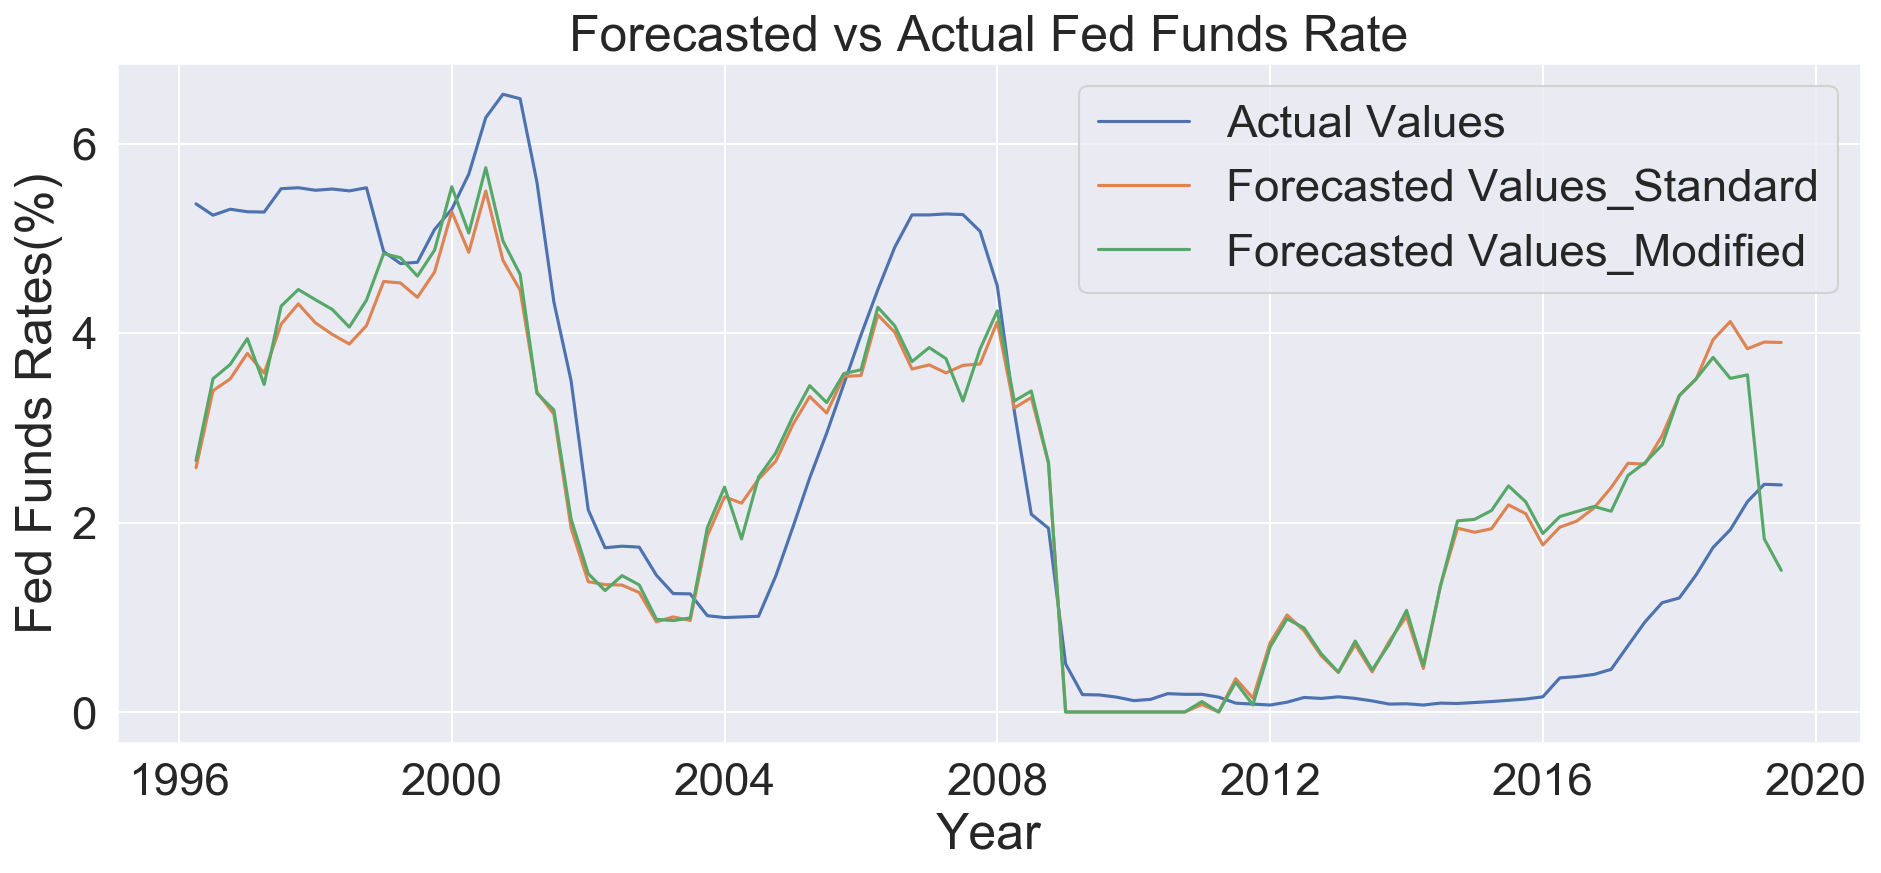

In [63]:
# WTUI_max = 2, change date = 2016-Q4
data4 = regression_actual(2,'2016-12-31','2016-09-30')
data4
# run the regression  
results_5 = regression_result(data4)
# plot the forecast vs. actual
plot_forecast(results_5,predict1_fed,data4)

federal funds rate (%)  Inflation rate_yearly change (%)  \
Time                                                                   
1996-03-31                5.363333                          2.000730   
1996-06-30                5.243333                          2.089581   
1996-09-30                5.306667                          2.108890   
1996-12-31                5.280000                          2.352762   
1997-03-31                5.276667                          2.236589   
1997-06-30                5.523333                          1.810431   
1997-09-30                5.533333                          1.646281   
1997-12-31                5.506667                          1.275693   
1998-03-31                5.520000                          0.838199   
1998-06-30                5.500000                          0.767662   
1998-09-30                5.533333                          0.813824   
1998-12-31                4.860000                          0.763247   
1999-03-31                4.733333                          1.019360   
1999-06-30                4.746667                          1.389111   
1999-09-30                5.093333                          1.610526   
1999-12-31                5.306667                          1.942660   
2000-03-31                5.676667                          2.525326   
2000-06-30                6.273333                          2.424895   
2000-09-30                6.520000                          2.515353   
2000-12-31                6.473333                          2.475903   
2001-03-31                5.593333                          2.316264   
2001-06-30                4.326667                          2.336706   
2001-09-30                3.496667                          1.767892   
2001-12-31                2.133333                          1.272690   
2002-03-31                1.733333                          0.778112   
2002-06-30                1.750000                          1.072749   
2002-09-30                1.740000                          1.506726   
2002-12-31                1.443333                          1.912582   
2003-03-31                1.250000                          2.440000   
2003-06-30                1.246667                          1.691238   
...                            ...                               ...   
2012-03-31                0.103333                          2.520316   
2012-06-30                0.153333                          1.762402   
2012-09-30                0.143333                          1.562072   
2012-12-31                0.160000                          1.784341   
2013-03-31                0.143333                          1.450702   
2013-06-30                0.116667                          1.283876   
2013-09-30                0.083333                          1.403130   
2013-12-31                0.086667                          1.248211   
2014-03-31                0.073333                          1.361629   
2014-06-30                0.093333                          1.770288   
2014-09-30                0.090000                          1.633059   
2014-12-31                0.100000                          1.091480   
2015-03-31                0.110000                          0.180740   
2015-06-30                0.123333                          0.196410   
2015-09-30                0.136667                          0.209459   
2015-12-31                0.160000                          0.253418   
2016-03-31                0.360000                          0.736284   
2016-06-30                0.373333                          0.836503   
2016-09-30                0.396667                          0.972527   
2016-12-31                0.450000                          1.509883   
2017-03-31                0.700000                          1.992313   
2017-06-30                0.950000                          1.622558   
2017-09-30                1.153333                  

                              OLS Regression Results                              
Dep. Variable:     federal funds rate (%)   R-squared:                       0.668
Model:                                OLS   Adj. R-squared:                  0.653
Method:                     Least Squares   F-statistic:                     44.83
Date:                    Fri, 22 Nov 2019   Prob (F-statistic):           1.44e-20
Time:                            16:45:49   Log-Likelihood:                -155.55
No. Observations:                      94   AIC:                             321.1
Df Residuals:                          89   BIC:                             333.8
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

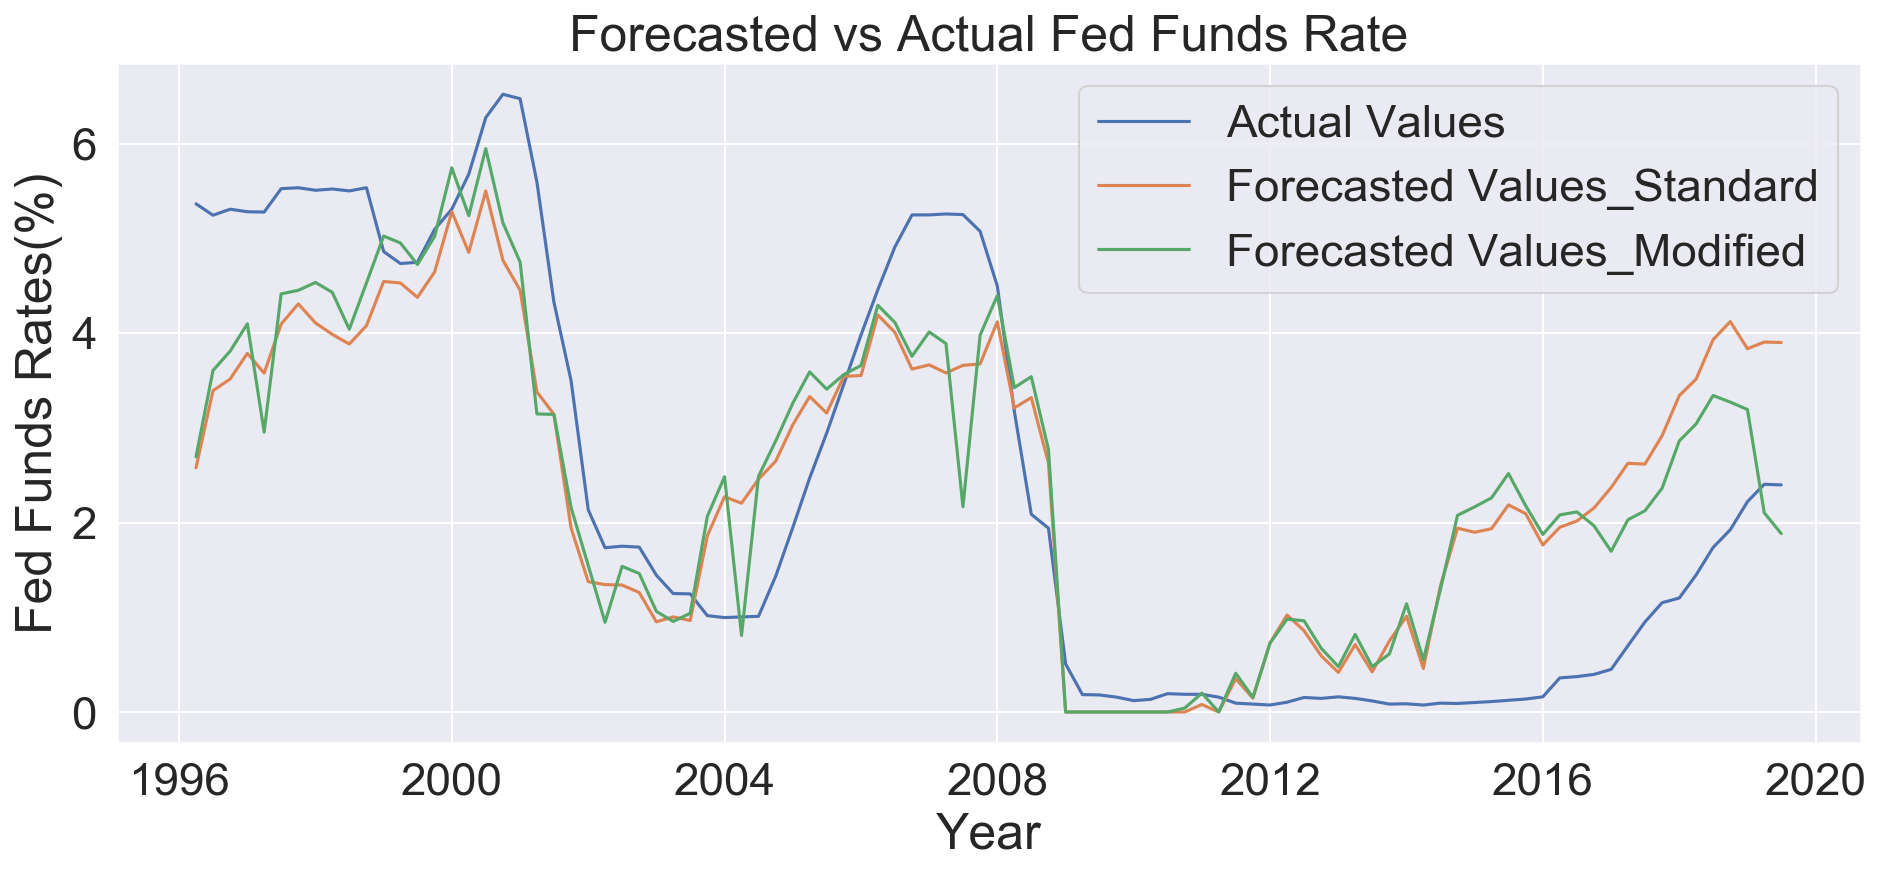

In [64]:
# WTUI_max = 5, change date = 2016-Q4
data4 = regression_actual(5,'2016-12-31','2016-09-30')
data4
# run the regression  
results_5 = regression_result(data4)
# plot the forecast vs. actual
plot_forecast(results_5,predict1_fed,data4)

federal funds rate (%)  Inflation rate_yearly change (%)  \
Time                                                                   
1996-03-31                5.363333                          2.000730   
1996-06-30                5.243333                          2.089581   
1996-09-30                5.306667                          2.108890   
1996-12-31                5.280000                          2.352762   
1997-03-31                5.276667                          2.236589   
1997-06-30                5.523333                          1.810431   
1997-09-30                5.533333                          1.646281   
1997-12-31                5.506667                          1.275693   
1998-03-31                5.520000                          0.838199   
1998-06-30                5.500000                          0.767662   
1998-09-30                5.533333                          0.813824   
1998-12-31                4.860000                          0.763247   
1999-03-31                4.733333                          1.019360   
1999-06-30                4.746667                          1.389111   
1999-09-30                5.093333                          1.610526   
1999-12-31                5.306667                          1.942660   
2000-03-31                5.676667                          2.525326   
2000-06-30                6.273333                          2.424895   
2000-09-30                6.520000                          2.515353   
2000-12-31                6.473333                          2.475903   
2001-03-31                5.593333                          2.316264   
2001-06-30                4.326667                          2.336706   
2001-09-30                3.496667                          1.767892   
2001-12-31                2.133333                          1.272690   
2002-03-31                1.733333                          0.778112   
2002-06-30                1.750000                          1.072749   
2002-09-30                1.740000                          1.506726   
2002-12-31                1.443333                          1.912582   
2003-03-31                1.250000                          2.440000   
2003-06-30                1.246667                          1.691238   
...                            ...                               ...   
2012-03-31                0.103333                          2.520316   
2012-06-30                0.153333                          1.762402   
2012-09-30                0.143333                          1.562072   
2012-12-31                0.160000                          1.784341   
2013-03-31                0.143333                          1.450702   
2013-06-30                0.116667                          1.283876   
2013-09-30                0.083333                          1.403130   
2013-12-31                0.086667                          1.248211   
2014-03-31                0.073333                          1.361629   
2014-06-30                0.093333                          1.770288   
2014-09-30                0.090000                          1.633059   
2014-12-31                0.100000                          1.091480   
2015-03-31                0.110000                          0.180740   
2015-06-30                0.123333                          0.196410   
2015-09-30                0.136667                          0.209459   
2015-12-31                0.160000                          0.253418   
2016-03-31                0.360000                          0.736284   
2016-06-30                0.373333                          0.836503   
2016-09-30                0.396667                          0.972527   
2016-12-31                0.450000                          1.509883   
2017-03-31                0.700000                          1.992313   
2017-06-30                0.950000                          1.622558   
2017-09-30                1.153333                  

                              OLS Regression Results                              
Dep. Variable:     federal funds rate (%)   R-squared:                       0.669
Model:                                OLS   Adj. R-squared:                  0.654
Method:                     Least Squares   F-statistic:                     45.02
Date:                    Fri, 22 Nov 2019   Prob (F-statistic):           1.28e-20
Time:                            16:45:51   Log-Likelihood:                -155.42
No. Observations:                      94   AIC:                             320.8
Df Residuals:                          89   BIC:                             333.6
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

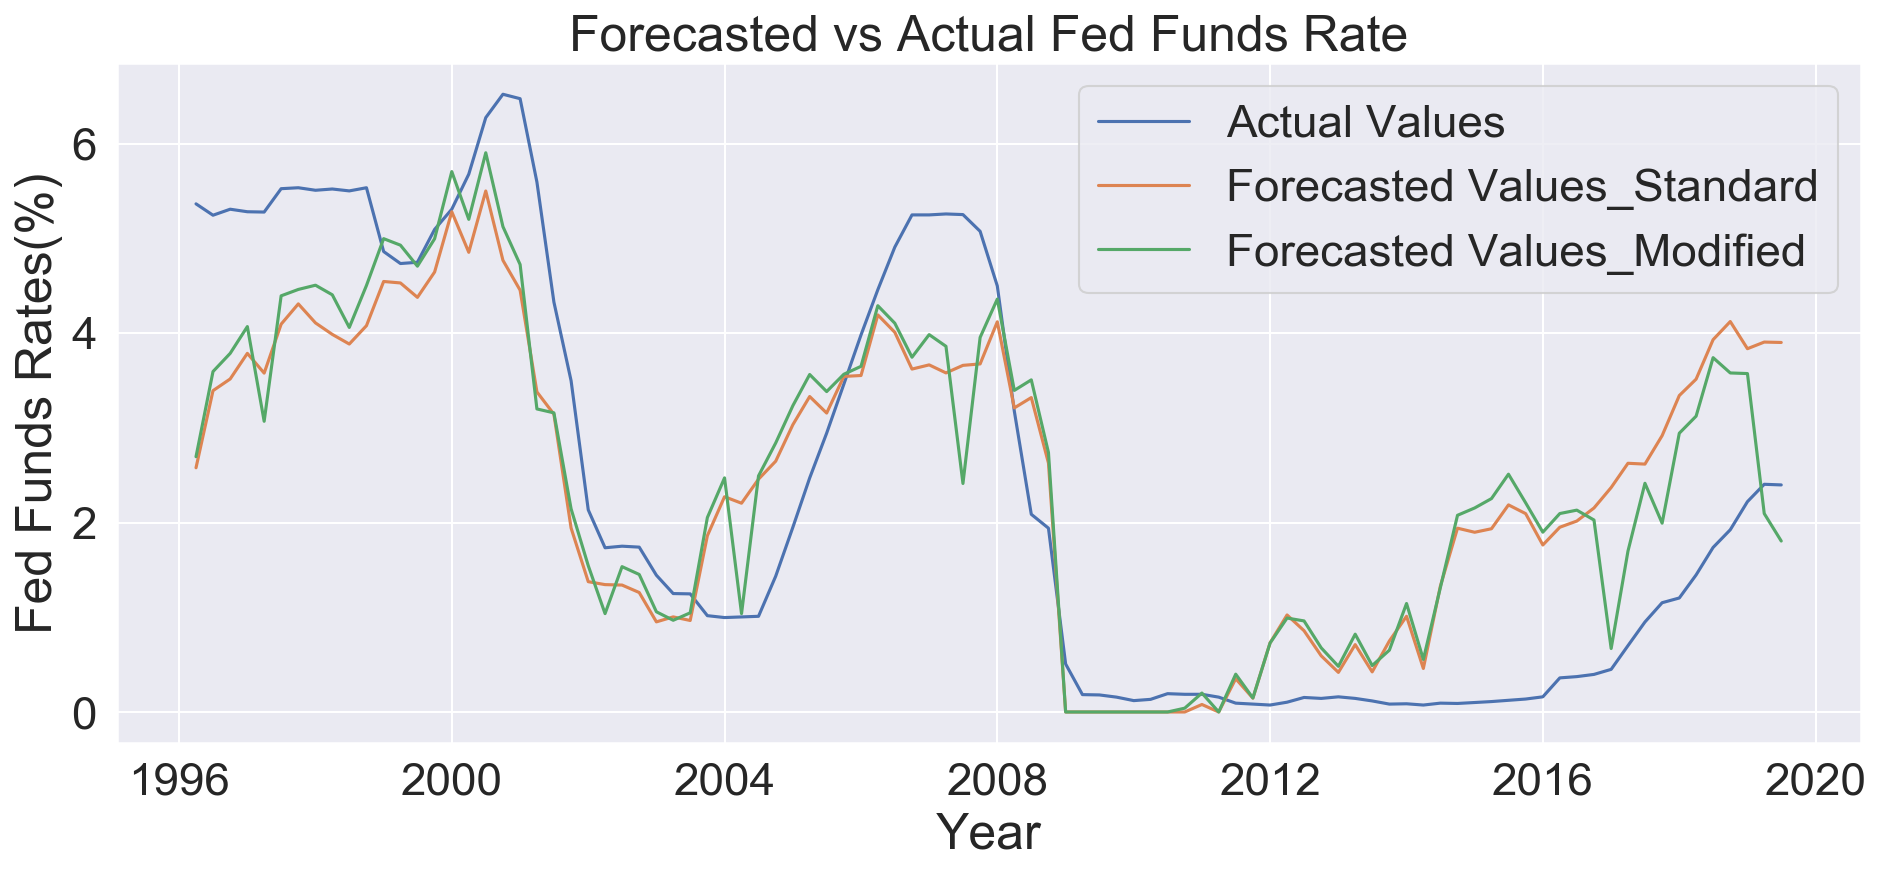

In [65]:
# WTUI_max = 2, change date = 2018-Q2
data4 = regression_actual(2,'2018-06-30','2018-03-31')
data4
# run the regression  
results_5 = regression_result(data4)
# plot the forecast vs. actual
plot_forecast(results_5,predict1_fed,data4)

federal funds rate (%)  Inflation rate_yearly change (%)  \
Time                                                                   
1996-03-31                5.363333                          2.000730   
1996-06-30                5.243333                          2.089581   
1996-09-30                5.306667                          2.108890   
1996-12-31                5.280000                          2.352762   
1997-03-31                5.276667                          2.236589   
1997-06-30                5.523333                          1.810431   
1997-09-30                5.533333                          1.646281   
1997-12-31                5.506667                          1.275693   
1998-03-31                5.520000                          0.838199   
1998-06-30                5.500000                          0.767662   
1998-09-30                5.533333                          0.813824   
1998-12-31                4.860000                          0.763247   
1999-03-31                4.733333                          1.019360   
1999-06-30                4.746667                          1.389111   
1999-09-30                5.093333                          1.610526   
1999-12-31                5.306667                          1.942660   
2000-03-31                5.676667                          2.525326   
2000-06-30                6.273333                          2.424895   
2000-09-30                6.520000                          2.515353   
2000-12-31                6.473333                          2.475903   
2001-03-31                5.593333                          2.316264   
2001-06-30                4.326667                          2.336706   
2001-09-30                3.496667                          1.767892   
2001-12-31                2.133333                          1.272690   
2002-03-31                1.733333                          0.778112   
2002-06-30                1.750000                          1.072749   
2002-09-30                1.740000                          1.506726   
2002-12-31                1.443333                          1.912582   
2003-03-31                1.250000                          2.440000   
2003-06-30                1.246667                          1.691238   
...                            ...                               ...   
2012-03-31                0.103333                          2.520316   
2012-06-30                0.153333                          1.762402   
2012-09-30                0.143333                          1.562072   
2012-12-31                0.160000                          1.784341   
2013-03-31                0.143333                          1.450702   
2013-06-30                0.116667                          1.283876   
2013-09-30                0.083333                          1.403130   
2013-12-31                0.086667                          1.248211   
2014-03-31                0.073333                          1.361629   
2014-06-30                0.093333                          1.770288   
2014-09-30                0.090000                          1.633059   
2014-12-31                0.100000                          1.091480   
2015-03-31                0.110000                          0.180740   
2015-06-30                0.123333                          0.196410   
2015-09-30                0.136667                          0.209459   
2015-12-31                0.160000                          0.253418   
2016-03-31                0.360000                          0.736284   
2016-06-30                0.373333                          0.836503   
2016-09-30                0.396667                          0.972527   
2016-12-31                0.450000                          1.509883   
2017-03-31                0.700000                          1.992313   
2017-06-30                0.950000                          1.622558   
2017-09-30                1.153333                  

                              OLS Regression Results                              
Dep. Variable:     federal funds rate (%)   R-squared:                       0.676
Model:                                OLS   Adj. R-squared:                  0.661
Method:                     Least Squares   F-statistic:                     46.35
Date:                    Fri, 22 Nov 2019   Prob (F-statistic):           5.39e-21
Time:                            16:45:52   Log-Likelihood:                -154.50
No. Observations:                      94   AIC:                             319.0
Df Residuals:                          89   BIC:                             331.7
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

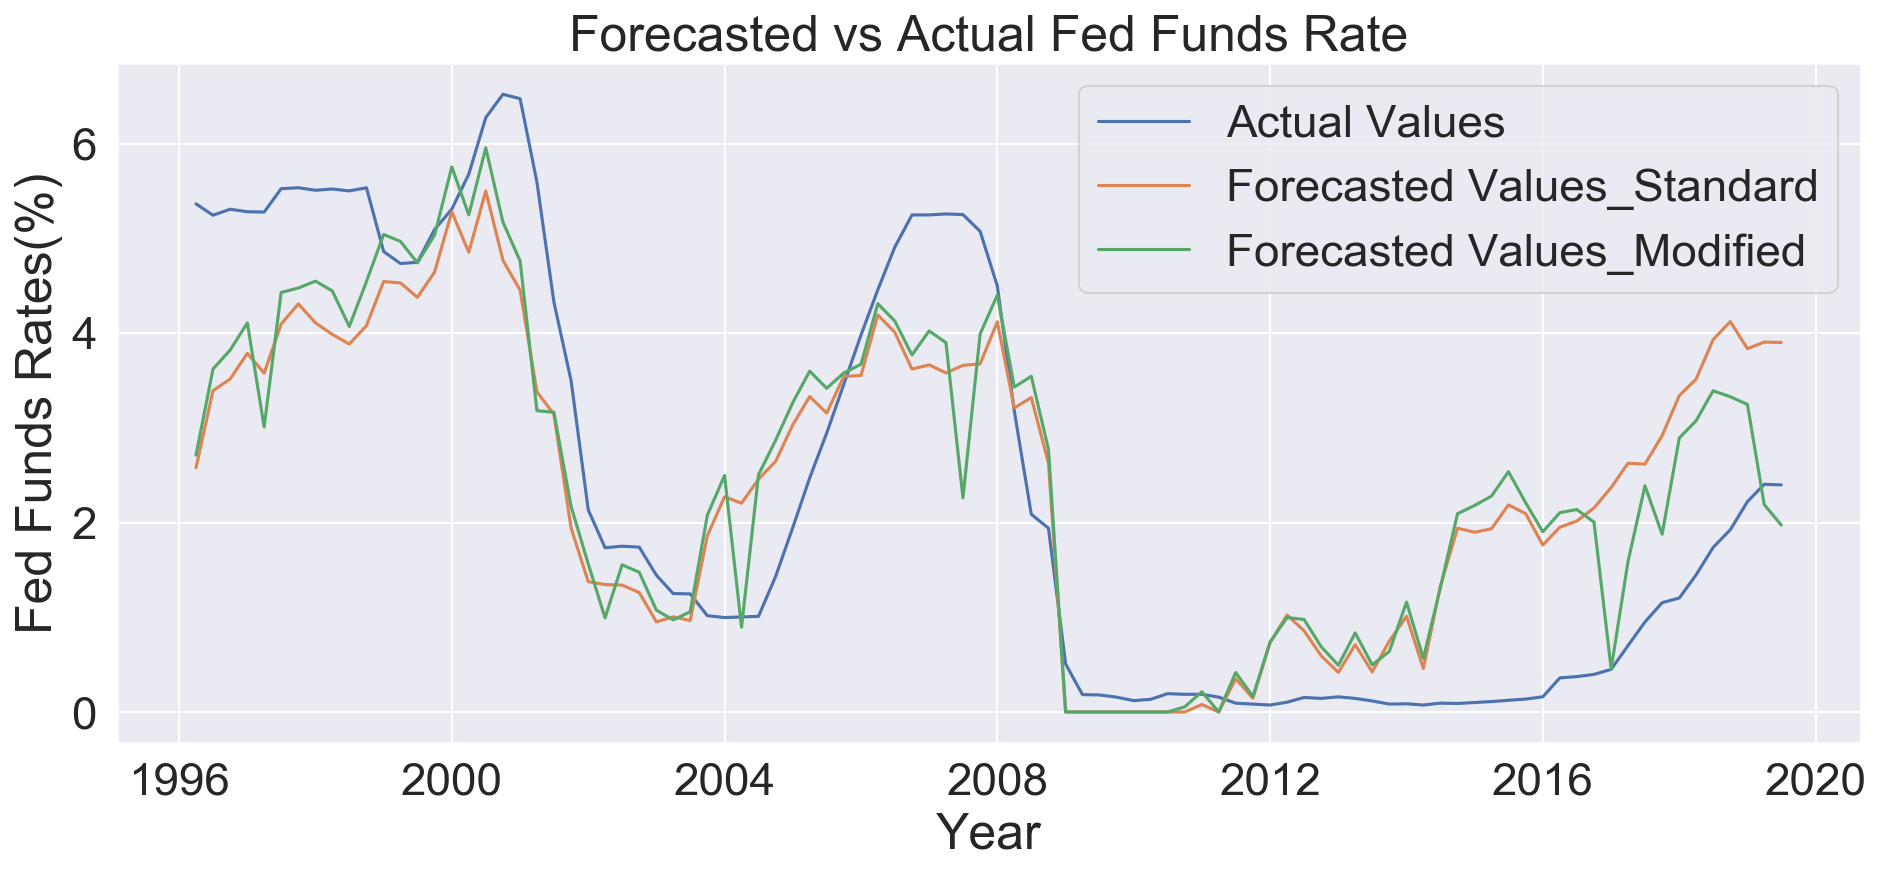

In [66]:
# WTUI_max = 5, change date = 2018-Q2
data4 = regression_actual(5,'2018-06-30','2018-03-31')
data4
# run the regression  
results_5 = regression_result(data4)
# plot the forecast vs. actual
plot_forecast(results_5,predict1_fed,data4)

#### 5. use actual WTUI and omit the WTUI_max terms 

In [42]:
# generate WTUI_avg with changing point
def regression_actual_omit(change_date1,change_date2):

    WTUI_1 = WTUI.copy()
    WTUI_1.loc[change_date1:,:] = 0
    WTUI_1 = WTUI_1.rename(columns={'World Trade Uncertainty (WTU) index (GDP weighted average)':'WTUI (t<k)'})

    WTUI_2 = WTUI.copy()
    WTUI_2.loc[:change_date2,:] = 0
    WTUI_2 = WTUI_2.rename(columns={'World Trade Uncertainty (WTU) index (GDP weighted average)':'WTUI (t>=k)'})

    data = pd.concat([data3,WTUI_1,WTUI_2],join='inner',axis=1)
    return data

federal funds rate (%)  Inflation rate_yearly change (%)  \
Time                                                                   
1996-03-31                5.363333                          2.000730   
1996-06-30                5.243333                          2.089581   
1996-09-30                5.306667                          2.108890   
1996-12-31                5.280000                          2.352762   
1997-03-31                5.276667                          2.236589   
1997-06-30                5.523333                          1.810431   
1997-09-30                5.533333                          1.646281   
1997-12-31                5.506667                          1.275693   
1998-03-31                5.520000                          0.838199   
1998-06-30                5.500000                          0.767662   
1998-09-30                5.533333                          0.813824   
1998-12-31                4.860000                          0.763247   
1999-03-31                4.733333                          1.019360   
1999-06-30                4.746667                          1.389111   
1999-09-30                5.093333                          1.610526   
1999-12-31                5.306667                          1.942660   
2000-03-31                5.676667                          2.525326   
2000-06-30                6.273333                          2.424895   
2000-09-30                6.520000                          2.515353   
2000-12-31                6.473333                          2.475903   
2001-03-31                5.593333                          2.316264   
2001-06-30                4.326667                          2.336706   
2001-09-30                3.496667                          1.767892   
2001-12-31                2.133333                          1.272690   
2002-03-31                1.733333                          0.778112   
2002-06-30                1.750000                          1.072749   
2002-09-30                1.740000                          1.506726   
2002-12-31                1.443333                          1.912582   
2003-03-31                1.250000                          2.440000   
2003-06-30                1.246667                          1.691238   
...                            ...                               ...   
2012-03-31                0.103333                          2.520316   
2012-06-30                0.153333                          1.762402   
2012-09-30                0.143333                          1.562072   
2012-12-31                0.160000                          1.784341   
2013-03-31                0.143333                          1.450702   
2013-06-30                0.116667                          1.283876   
2013-09-30                0.083333                          1.403130   
2013-12-31                0.086667                          1.248211   
2014-03-31                0.073333                          1.361629   
2014-06-30                0.093333                          1.770288   
2014-09-30                0.090000                          1.633059   
2014-12-31                0.100000                          1.091480   
2015-03-31                0.110000                          0.180740   
2015-06-30                0.123333                          0.196410   
2015-09-30                0.136667                          0.209459   
2015-12-31                0.160000                          0.253418   
2016-03-31                0.360000                          0.736284   
2016-06-30                0.373333                          0.836503   
2016-09-30                0.396667                          0.972527   
2016-12-31                0.450000                          1.509883   
2017-03-31                0.700000                          1.992313   
2017-06-30                0.950000                          1.622558   
2017-09-30                1.153333                  

                              OLS Regression Results                              
Dep. Variable:     federal funds rate (%)   R-squared:                       0.656
Model:                                OLS   Adj. R-squared:                  0.641
Method:                     Least Squares   F-statistic:                     42.50
Date:                    Fri, 22 Nov 2019   Prob (F-statistic):           6.87e-20
Time:                            16:34:13   Log-Likelihood:                -157.21
No. Observations:                      94   AIC:                             324.4
Df Residuals:                          89   BIC:                             337.1
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

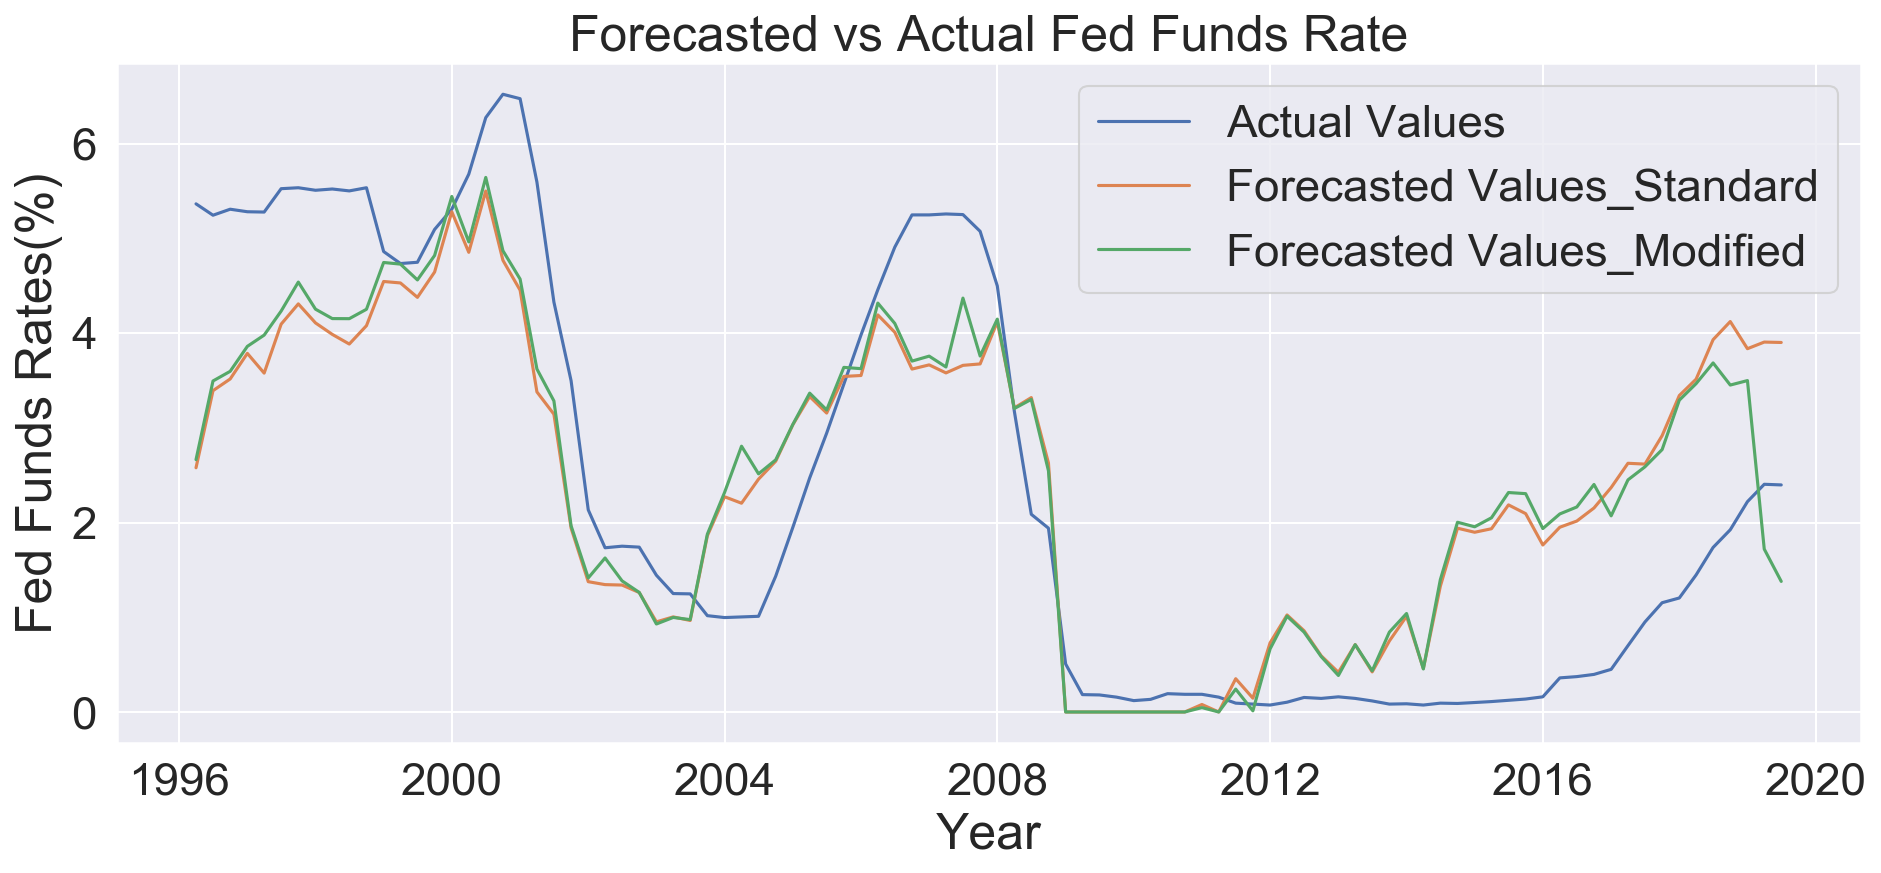

In [43]:
data4 = regression_actual_omit('2016-12-31','2016-09-30')
data4
# run the regression  
results_5 = regression_result(data4)
# plot the forecast vs. actual
plot_forecast(results_5,predict1_fed,data4)

federal funds rate (%)  Inflation rate_yearly change (%)  \
Time                                                                   
1996-03-31                5.363333                          2.000730   
1996-06-30                5.243333                          2.089581   
1996-09-30                5.306667                          2.108890   
1996-12-31                5.280000                          2.352762   
1997-03-31                5.276667                          2.236589   
1997-06-30                5.523333                          1.810431   
1997-09-30                5.533333                          1.646281   
1997-12-31                5.506667                          1.275693   
1998-03-31                5.520000                          0.838199   
1998-06-30                5.500000                          0.767662   
1998-09-30                5.533333                          0.813824   
1998-12-31                4.860000                          0.763247   
1999-03-31                4.733333                          1.019360   
1999-06-30                4.746667                          1.389111   
1999-09-30                5.093333                          1.610526   
1999-12-31                5.306667                          1.942660   
2000-03-31                5.676667                          2.525326   
2000-06-30                6.273333                          2.424895   
2000-09-30                6.520000                          2.515353   
2000-12-31                6.473333                          2.475903   
2001-03-31                5.593333                          2.316264   
2001-06-30                4.326667                          2.336706   
2001-09-30                3.496667                          1.767892   
2001-12-31                2.133333                          1.272690   
2002-03-31                1.733333                          0.778112   
2002-06-30                1.750000                          1.072749   
2002-09-30                1.740000                          1.506726   
2002-12-31                1.443333                          1.912582   
2003-03-31                1.250000                          2.440000   
2003-06-30                1.246667                          1.691238   
...                            ...                               ...   
2012-03-31                0.103333                          2.520316   
2012-06-30                0.153333                          1.762402   
2012-09-30                0.143333                          1.562072   
2012-12-31                0.160000                          1.784341   
2013-03-31                0.143333                          1.450702   
2013-06-30                0.116667                          1.283876   
2013-09-30                0.083333                          1.403130   
2013-12-31                0.086667                          1.248211   
2014-03-31                0.073333                          1.361629   
2014-06-30                0.093333                          1.770288   
2014-09-30                0.090000                          1.633059   
2014-12-31                0.100000                          1.091480   
2015-03-31                0.110000                          0.180740   
2015-06-30                0.123333                          0.196410   
2015-09-30                0.136667                          0.209459   
2015-12-31                0.160000                          0.253418   
2016-03-31                0.360000                          0.736284   
2016-06-30                0.373333                          0.836503   
2016-09-30                0.396667                          0.972527   
2016-12-31                0.450000                          1.509883   
2017-03-31                0.700000                          1.992313   
2017-06-30                0.950000                          1.622558   
2017-09-30                1.153333                  

                              OLS Regression Results                              
Dep. Variable:     federal funds rate (%)   R-squared:                       0.665
Model:                                OLS   Adj. R-squared:                  0.650
Method:                     Least Squares   F-statistic:                     44.20
Date:                    Fri, 22 Nov 2019   Prob (F-statistic):           2.19e-20
Time:                            16:34:19   Log-Likelihood:                -155.99
No. Observations:                      94   AIC:                             322.0
Df Residuals:                          89   BIC:                             334.7
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

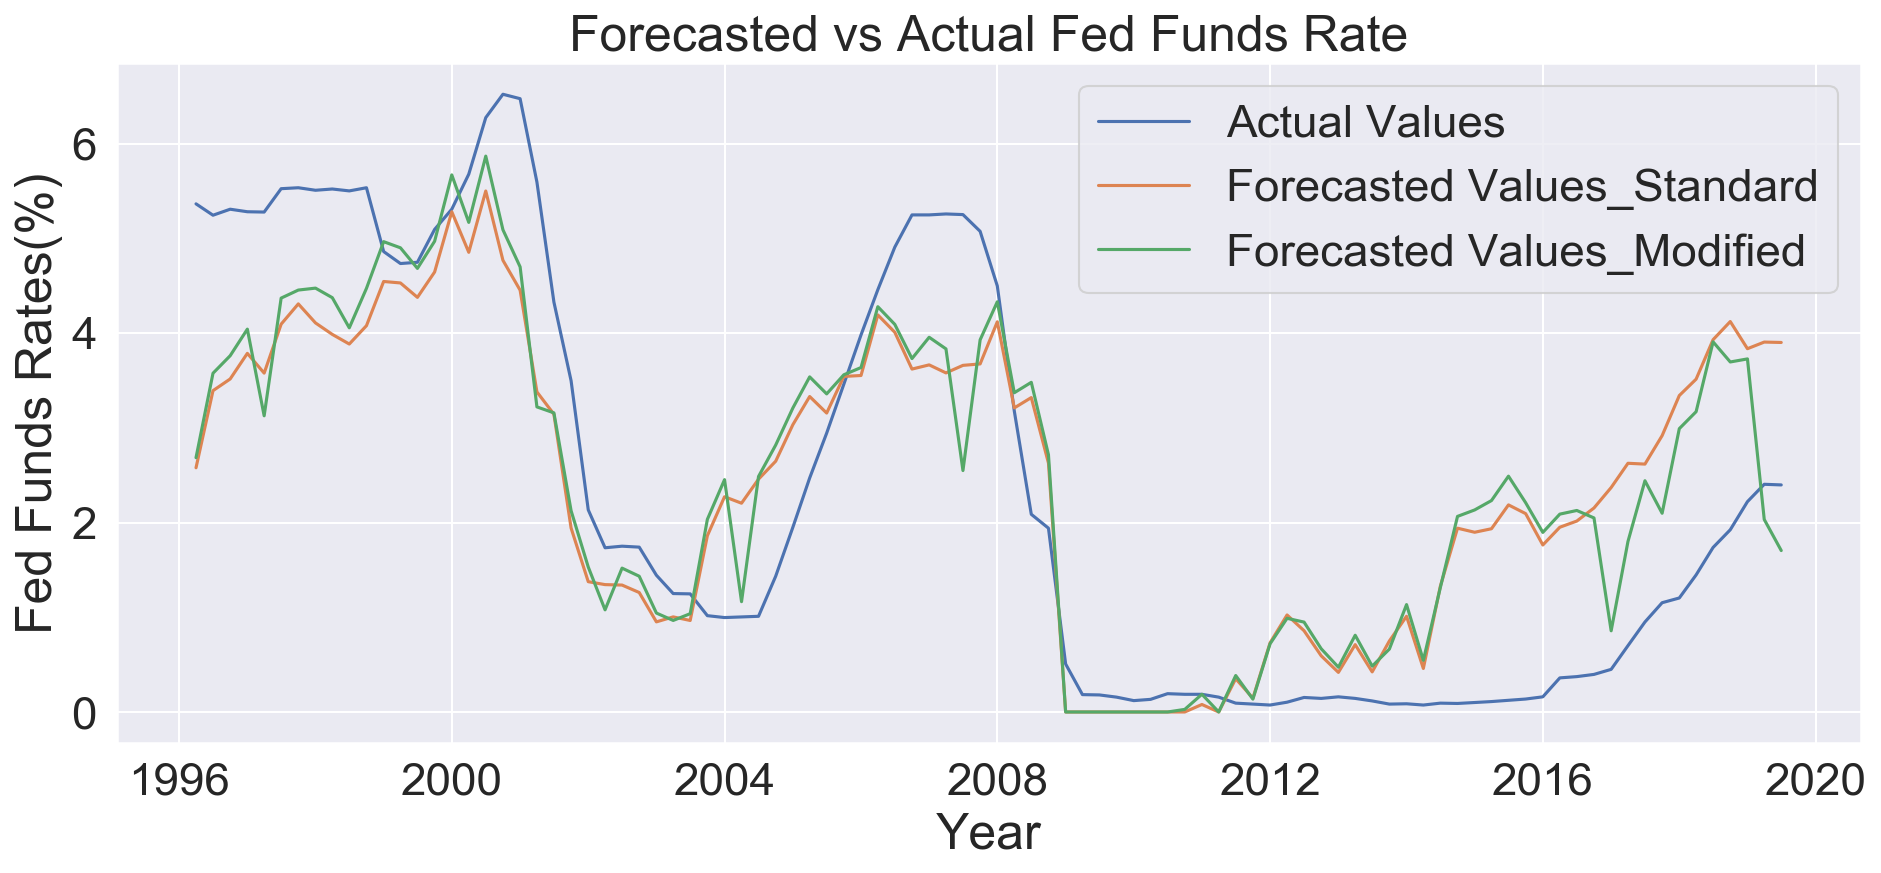

In [44]:
# WTUI_max = 2, change date = 2018-Q2
data4 = regression_actual_omit('2018-06-30','2018-03-31')
data4
# run the regression  
results_5 = regression_result(data4)
# plot the forecast vs. actual
plot_forecast(results_5,predict1_fed,data4)